### 안전변수명 리스트 생성

In [1]:
common_columns = ['DNBR', 'DTHY', 'DWB', 'HLW', 'HTR', 'HUP', 'LSGA', 'LSGB', 'LVCR',
'LVPZ', 'LWRB', 'NSGA', 'NSGB', 'P', 'PPM', 'PRB', 'PRBA', 'PSGA',
       'PSGB', 'PWNT', 'PWR', 'QMGA', 'QMGB', 'QMWT', 'RBLK', 'RC131', 'RC87',
       'RH', 'RHBR', 'RHFL', 'RHMT', 'RHRD', 'RM1', 'RM2', 'RM3', 'RM4',
       'SCMA', 'SCMB', 'SGLK', 'STRB', 'STSG', 'STTB', 'TAVG', 'TBLD', 'TCA',
       'TCB', 'TF', 'TFPK', 'TFSB', 'THA', 'THB', 'TIME', 'TPCT', 'TRB',
       'TSAT', 'VOID', 'VOL', 'WBK', 'WCFT', 'WCHG', 'WCSP', 'WECS', 'WFWA',
       'WFWB', 'WHPI', 'WLR', 'WRCA', 'WRCB', 'WRLA', 'WRLB', 'WSPY', 'WSTA',
       'WSTB', 'WTRA', 'WTRB', 'WUP', 'label']

In [2]:
common_columns2 = ['DNBR', 'DTHY', 'DWB', 'HLW', 'HTR', 'HUP', 'LSGA', 'LSGB', 'LVCR',
       'LVPZ', 'LWRB', 'NSGA', 'NSGB', 'P', 'PPM', 'PRB', 'PRBA', 'PSGA',
       'PSGB', 'PWNT', 'PWR', 'QMGA', 'QMGB', 'QMWT', 'RBLK', 'RC131', 'RC87',
       'RH', 'RHBR', 'RHFL', 'RHMT', 'RHRD', 'RM1', 'RM2', 'RM3', 'RM4',
       'SCMA', 'SCMB', 'SGLK', 'STRB', 'STSG', 'STTB', 'TAVG', 'TBLD', 'TCA',
       'TCB', 'TF', 'TFPK', 'TFSB', 'THA', 'THB', 'TIME', 'TPCT', 'TRB',
       'TSAT', 'VOID', 'VOL', 'WBK', 'WCFT', 'WCHG', 'WCSP', 'WECS', 'WFWA',
       'WFWB', 'WHPI', 'WLR', 'WRCA', 'WRCB', 'WRLA', 'WRLB', 'WSPY', 'WSTA',
       'WSTB', 'WTRA', 'WTRB', 'WUP']

### 주어진 시계열 데이터에 label 요소 매칭

In [3]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import os
import csv
from tqdm import tqdm
pathList = []
##1. 패스 생성
homePath = 'train/' #들여다볼 폴더들이 있는 상위 폴더
folders = os.listdir(homePath) #불러올 각 폴더들을 리스트에 저장합니다.

for folder in (folders): #불러올 폴더가 여러개이니 반복문을 이용합니다.
    folderName = folder #folderName에 각 폴더명을 저장합니다.

    files = os.listdir(homePath + folder) #불러올 각 파일들을 리스트에 저장합니다.

    for file in files: #불러올 파일 또한 여러개이니 반복문을 이용합니다.
        fileName = file #fileName에 각 파일명을 저장합니다.

        path = homePath + folderName + '/' + fileName #알아낸 폴더와 파일을 이름을 조합합니다.

        pathList.append(path) #path들을 한 리스트에 저장
        
# csv 불러오기
dfs=[]
def load_csv(pathList):
    for a,file in tqdm(enumerate(pathList)):
        df = pd.read_csv(file)
        df['label'] = pathList[a].split('/')[1]
        dfs.append(df)
    return dfs
load_csv(pathList)


train = pd.concat([df[common_columns]for df in dfs], axis=0, ignore_index=True)
# 변수 WPCS, WPMU, WPFW 칼럼 제거
train = train.dropna(axis=1)

806it [00:12, 64.78it/s]


In [4]:
pathList = []
##1. 패스 생성
homePath = 'test/' #들여다볼 폴더들이 있는 상위 폴더
folders = os.listdir(homePath) #불러올 각 폴더들을 리스트에 저장합니다.

for folder in (folders): #불러올 폴더가 여러개이니 반복문을 이용합니다.
    folderName = folder #folderName에 각 폴더명을 저장합니다.

    files = os.listdir(homePath + folder) #불러올 각 파일들을 리스트에 저장합니다.

    for file in files: #불러올 파일 또한 여러개이니 반복문을 이용합니다.
        fileName = file #fileName에 각 파일명을 저장합니다.

        path = homePath + folderName + '/' + fileName #알아낸 폴더와 파일을 이름을 조합합니다.

        pathList.append(path) #path들을 한 리스트에 저장
        
# csv 불러오기
dfs=[]
load_csv(pathList)

test = pd.concat([df[common_columns]for df in dfs], axis=0, ignore_index=True)
# 변수 WPCS, WPMU, WPFW 칼럼 제거
test = test.dropna(axis=1)

206it [00:03, 61.94it/s]


### 데이터 전처리

In [5]:
# 단일 : Normal, SP, LACP, LOF, ATWS, TT  
#idx = train[(train['label']  == 'LOF') | (train['label']  == 'NORM') | (train['label'] == 'SP') | (train['label'] == 'LACP') | (train['label'] == 'ATWS') | (train['label'] == 'TT')].index
#train.drop(idx, axis = 0, inplace=True)
#idx = test[(test['label']  == 'LOF') | (test['label']  == 'NORM') | (test['label'] == 'SP') | (test['label'] == 'LACP') | (test['label'] == 'ATWS') | (test['label'] == 'TT')].index
#test.drop(idx, axis = 0, inplace=True)

In [6]:
# 데이터 축소
train = train[train['TIME'] <= 3500]
test = test[test['TIME'] <= 3500]

In [7]:
# 30초 간격으로 데이터 축소해보기
trian = train[train['TIME'] % 10 == 0]
train.reset_index(drop=True, inplace = True)
test = test[test['TIME'] % 10 == 0]
test.reset_index(drop=True, inplace = True)

In [8]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])
test['label'] = le.fit_transform(test['label'])

In [9]:
le.classes_

array(['ATWS', 'FLB', 'LACP', 'LLB', 'LOCA', 'LOCAC', 'LOF', 'LR', 'MD',
       'NORM', 'SGATR', 'SGBTR', 'SLBIC', 'SLBOC', 'SP', 'TT'],
      dtype=object)

In [10]:
train

DNBR      DTHY       DWB          HLW         HTR          HUP  \
0         1.630000  0.009256  0.000692  1310.893433  200.000006  2583.701416   
1         1.629482  0.009256  0.000692  1310.863403  197.180080  2583.630371   
2         1.628558  0.009256  0.000692  1310.835815  193.024412  2583.524902   
3         1.628483  0.009256  0.000692  1310.819458  188.415659  2583.408447   
4         1.628626  0.009256  0.000692  1310.806519  184.107669  2583.299316   
...            ...       ...       ...          ...         ...          ...   
565001  376.794617  0.009256  0.000692  1339.010010    1.105545  2578.640869   
565002  376.707184  0.009256  0.000692  1339.002563    1.253962  2578.644531   
565003  376.852783  0.009256  0.000692  1339.009277    1.150461  2578.641846   
565004  376.790894  0.009256  0.000692  1339.004272    1.191471  2578.643066   
565005  376.874573  0.009256  0.000692  1339.007080    1.232481  2578.644287   

             LSGA       LSGB      LVCR       LVPZ  ...          WRCB  WRLA  \
0       10.957693  10.957693  7.924896  52.600002  ...  27556.000000   0.0   
1       10.957623  10.957623  7.924896  52.618706  ...  27556.000000   0.0   
2       10.957539  10.957539  7.924896  52.657574  ...  27556.000000   0.0   
3       10.957538  10.957538  7.924896  52.703625  ...  27556.000000   0.0   
4       10.957580  10.957580  7.924896  52.745777  ...  27556.000000   0.0   
...           ...        ...       ...        ...  ...           ...   ...   
565001  12.844977  12.844049  7.924896  34.293045  ...  28580.123047   0.0   
565002  12.845328  12.843869  7.924896  34.290970  ...  28580.123047   0.0   
565003  12.845477  12.844176  7.924896  34.292393  ...  28580.123047   0.0   
565004  12.844922  12.844245  7.924896  34.291805  ...  28580.123047   0.0   
565005  12.845024  12.844715  7.924896  34.291248  ...  28580.123047   0.0   

        WRLB  WSPY         WSTA         WSTB  WTRA  WTRB  WUP  label  
0        0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
1        0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
2        0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
3        0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
4        0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
...      ...   ...          ...          ...   ...   ...  ...    ...  
565001   0.0   0.0    50.907940     2.737987   0.0   0.0  0.0     15  
565002   0.0   0.0    64.734749   -10.791990   0.0   0.0  0.0     15  
565003   0.0   0.0    62.443359    -8.085601   0.0   0.0  0.0     15  
565004   0.0   0.0    46.214157     7.657332   0.0   0.0  0.0     15  
565005   0.0   0.0    33.476585    20.994482   0.0   0.0  0.0     15  

[565006 rows x 77 columns]

In [11]:
test

DNBR      DTHY       DWB          HLW         HTR          HUP  \
0        1.630000  0.009256  0.000692  1310.893433  200.000006  2583.701416   
1        1.628558  0.009256  0.000692  1310.835815  193.024412  2583.524902   
2        1.628626  0.009256  0.000692  1310.806519  184.107669  2583.299316   
3        1.628186  0.009256  0.000692  1310.785522  175.821699  2583.089355   
4        1.628236  0.009256  0.000692  1310.774292  167.813042  2582.886230   
...           ...       ...       ...          ...         ...          ...   
72301  376.550903  0.009256  0.000692  1339.003540    1.230528  2578.644287   
72302  376.663635  0.009256  0.000692  1339.005859    1.140697  2578.641602   
72303  376.794617  0.009256  0.000692  1339.010010    1.105545  2578.640869   
72304  376.852783  0.009256  0.000692  1339.009277    1.150461  2578.641846   
72305  376.874573  0.009256  0.000692  1339.007080    1.232481  2578.644287   

            LSGA       LSGB      LVCR       LVPZ  ...          WRCB  WRLA  \
0      10.957693  10.957693  7.924896  52.600002  ...  27556.000000   0.0   
1      10.957539  10.957539  7.924896  52.657574  ...  27556.000000   0.0   
2      10.957580  10.957580  7.924896  52.745777  ...  27556.000000   0.0   
3      10.957728  10.957728  7.924896  52.826553  ...  27556.000000   0.0   
4      10.957999  10.957999  7.924896  52.905136  ...  27556.000000   0.0   
...          ...        ...       ...        ...  ...           ...   ...   
72301  12.845326  12.843851  7.924896  34.291355  ...  28580.123047   0.0   
72302  12.844810  12.844302  7.924896  34.292503  ...  28580.123047   0.0   
72303  12.844977  12.844049  7.924896  34.293045  ...  28580.123047   0.0   
72304  12.845477  12.844176  7.924896  34.292393  ...  28580.123047   0.0   
72305  12.845024  12.844715  7.924896  34.291248  ...  28580.123047   0.0   

       WRLB  WSPY         WSTA         WSTB  WTRA  WTRB  WUP  label  
0       0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
1       0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
2       0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
3       0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
4       0.0   0.0  2873.244873  2873.244873   0.0   0.0  0.0      0  
...     ...   ...          ...          ...   ...   ...  ...    ...  
72301   0.0   0.0    60.936943    -7.007985   0.0   0.0  0.0     15  
72302   0.0   0.0    31.592506    22.232904   0.0   0.0  0.0     15  
72303   0.0   0.0    50.907940     2.737987   0.0   0.0  0.0     15  
72304   0.0   0.0    62.443359    -8.085601   0.0   0.0  0.0     15  
72305   0.0   0.0    33.476585    20.994482   0.0   0.0  0.0     15  

[72306 rows x 77 columns]

---

### XGBoost 트레이닝

In [10]:
# xgboost  실행
from xgboost import XGBClassifier
Y_train = train['label']
Y_test = test['label']
train = train.drop(['label', 'TIME'], axis = 1)
test = test.drop(['label', 'TIME'], axis = 1)

In [11]:
%%time
# 훈련
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y_train, test_size=0.2)
xgb = XGBClassifier(tree_method = 'gpu_hist',  
                    predictor = 'gpu_predictor',
                    n_estimators = 1000, 
                    objective = 'multi:softproba',
                    learning_rate = 0.01,
                    scale_pos_weight=100,
                    seed=1214
                   )
xgb_model = xgb.fit(X_train, y_train, eval_metric = 'mlogloss', eval_set = [(X_test, y_test)], early_stopping_rounds=25)

C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[15:53:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:2.69557
[1]	validation_0-mlogloss:2.62431
[2]	validation_0-mlogloss:2.55798
[3]	validation_0-mlogloss:2.49610
[4]	validation_0-mlogloss:2.43803
[5]	validation_0-mlogloss:2.38324
[6]	validation_0-mlogloss:2.33145
[7]	validation_0-mlogloss:2.28236
[8]	validation_0-mlogloss:2.23567
[9]	validation_0-mlogloss:2.19119
[10]	validation_0-mlogloss:2.14870
[11]	validation_0-mlogloss:2.10806
[12]	validation_0-mlogloss:2.06902
[13]	validation_0-mlogloss:2.03161
[14]	validation_0-mlogloss:1.99561
[15]	validation_0-mlogloss:1.96088
[16]	validation_0-mloglos

In [12]:
pred = xgb_model.predict(test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(Y_test, pred) # 정확도 계산
precision = precision_score(Y_test, pred, average='weighted') # 정밀도 계산
recall = recall_score(Y_test, pred, average='weighted') # 재현율 계산
f1 = f1_score(Y_test, pred, average='weighted') # F1-Score 계산
# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9701131303073051
Precision: 0.9701987533969537
Recall: 0.9701131303073051
F1-Score: 0.9700500640977163


### XGBoost 모델 분석(Plot Importance)

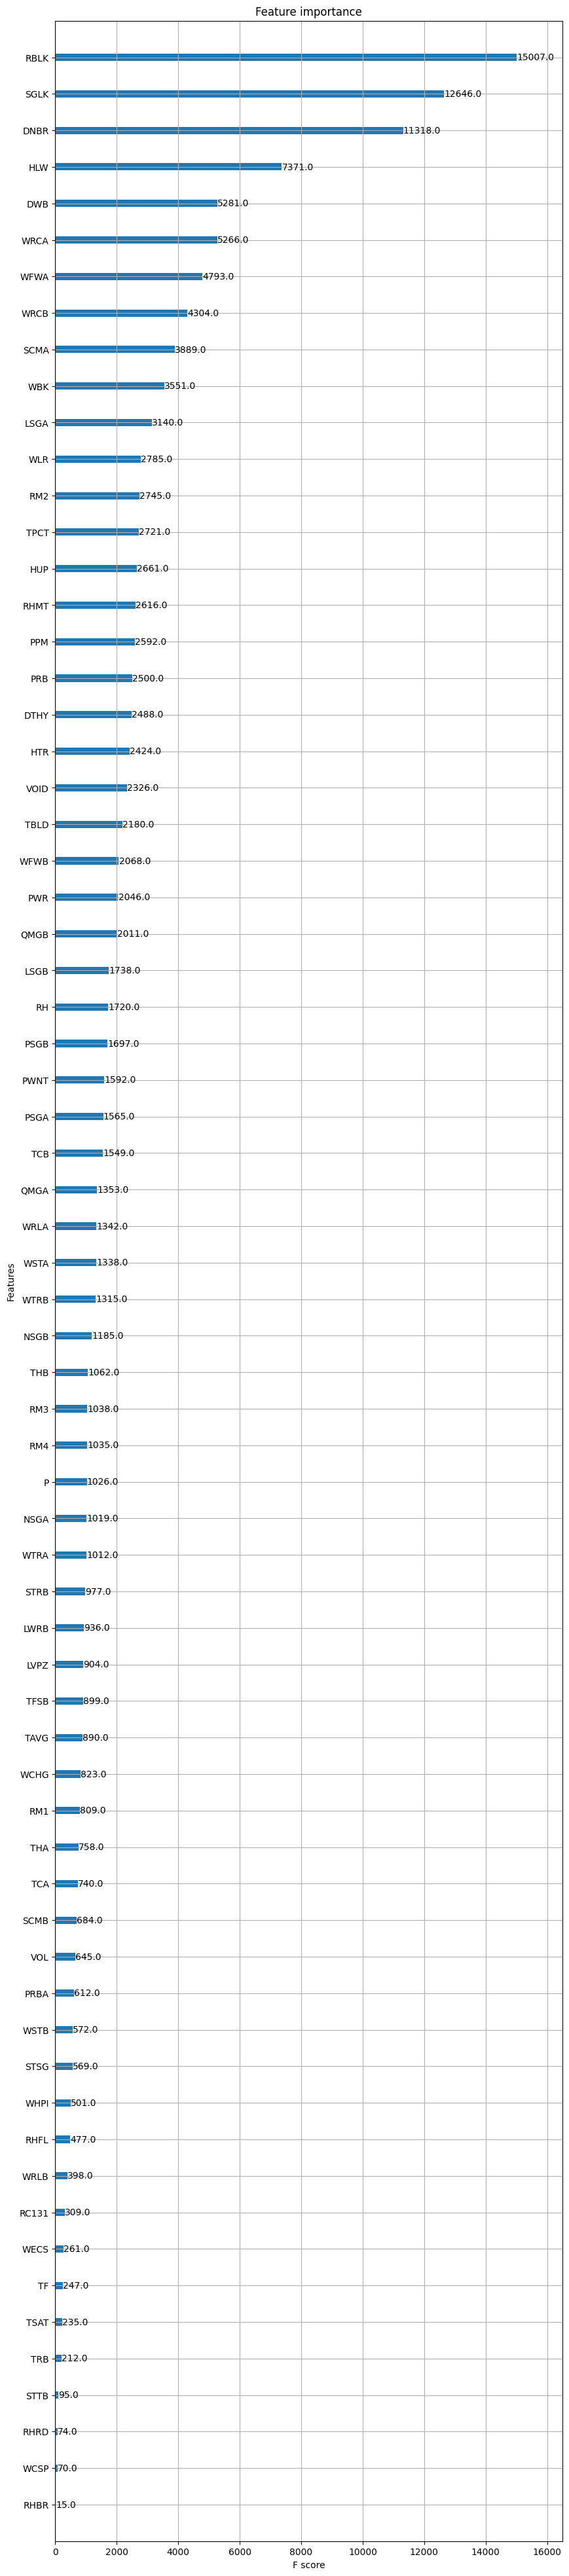

In [14]:
# Plot Importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax)
plt.show()

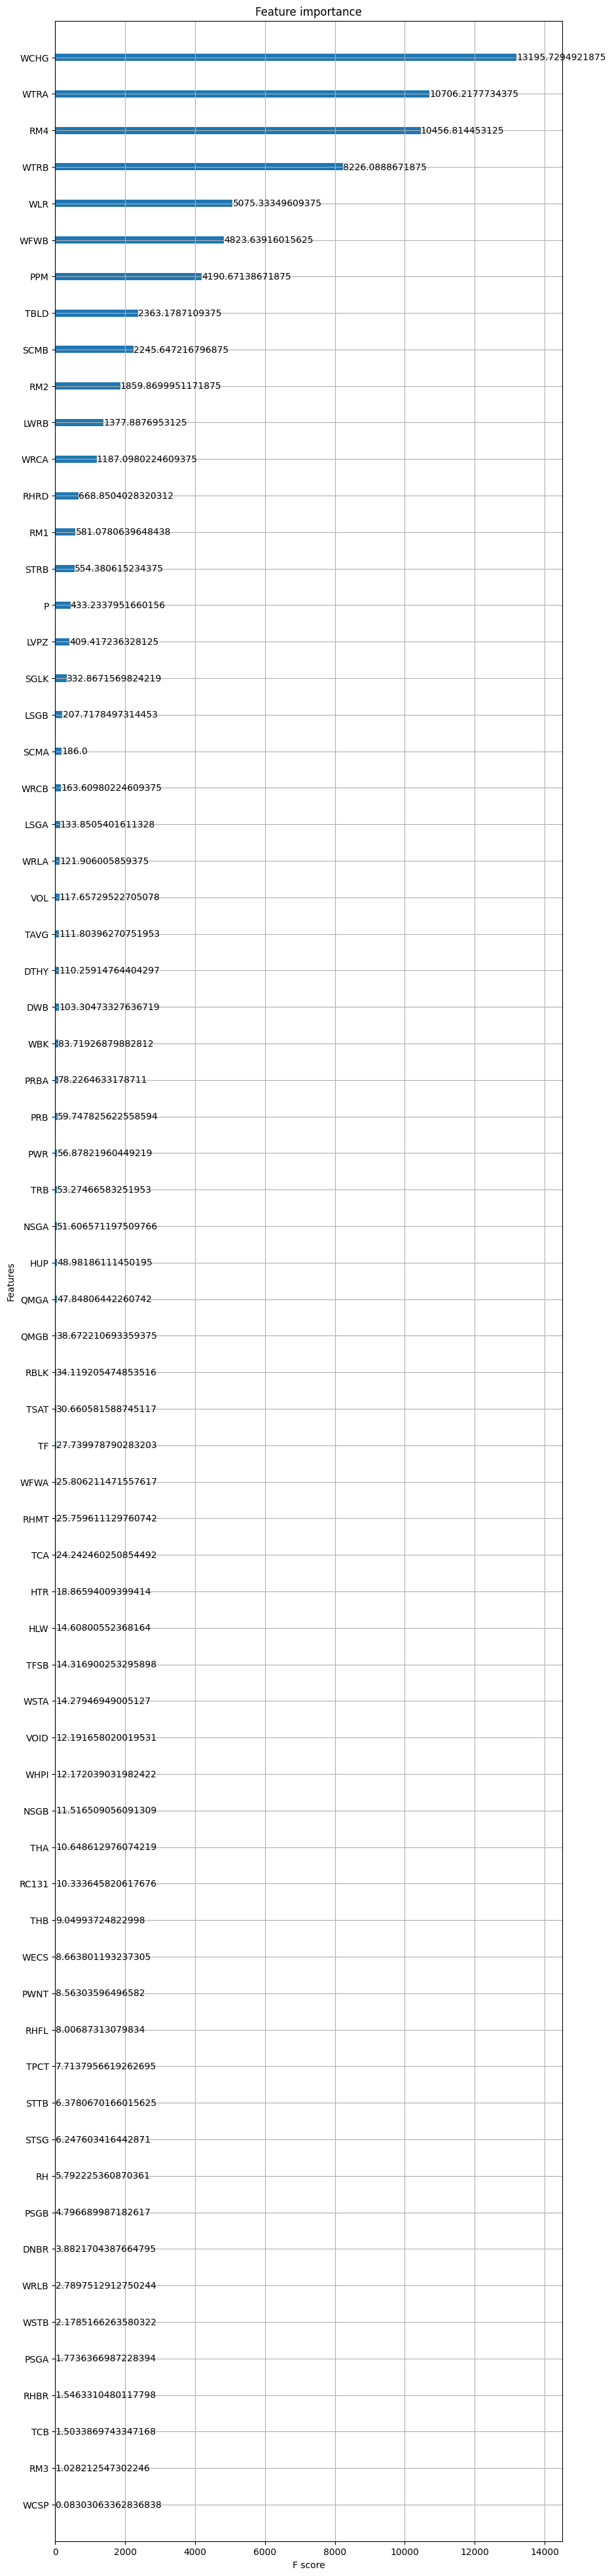

In [15]:
fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax, importance_type='gain')
plt.show()

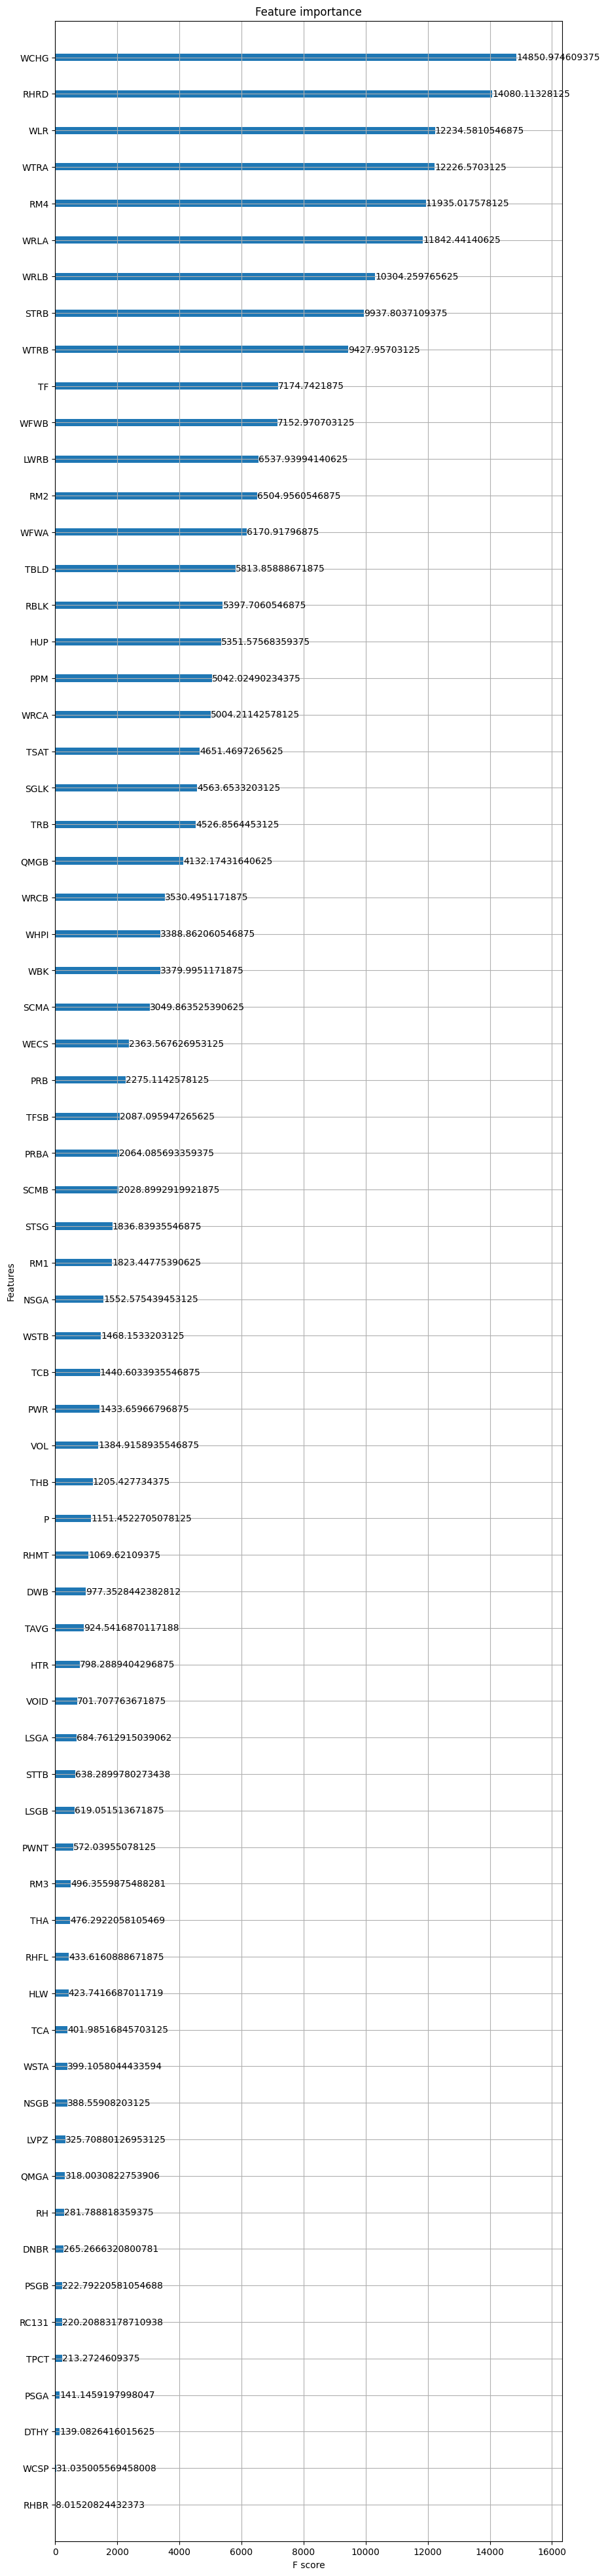

In [16]:
fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax, importance_type='cover')
plt.show()

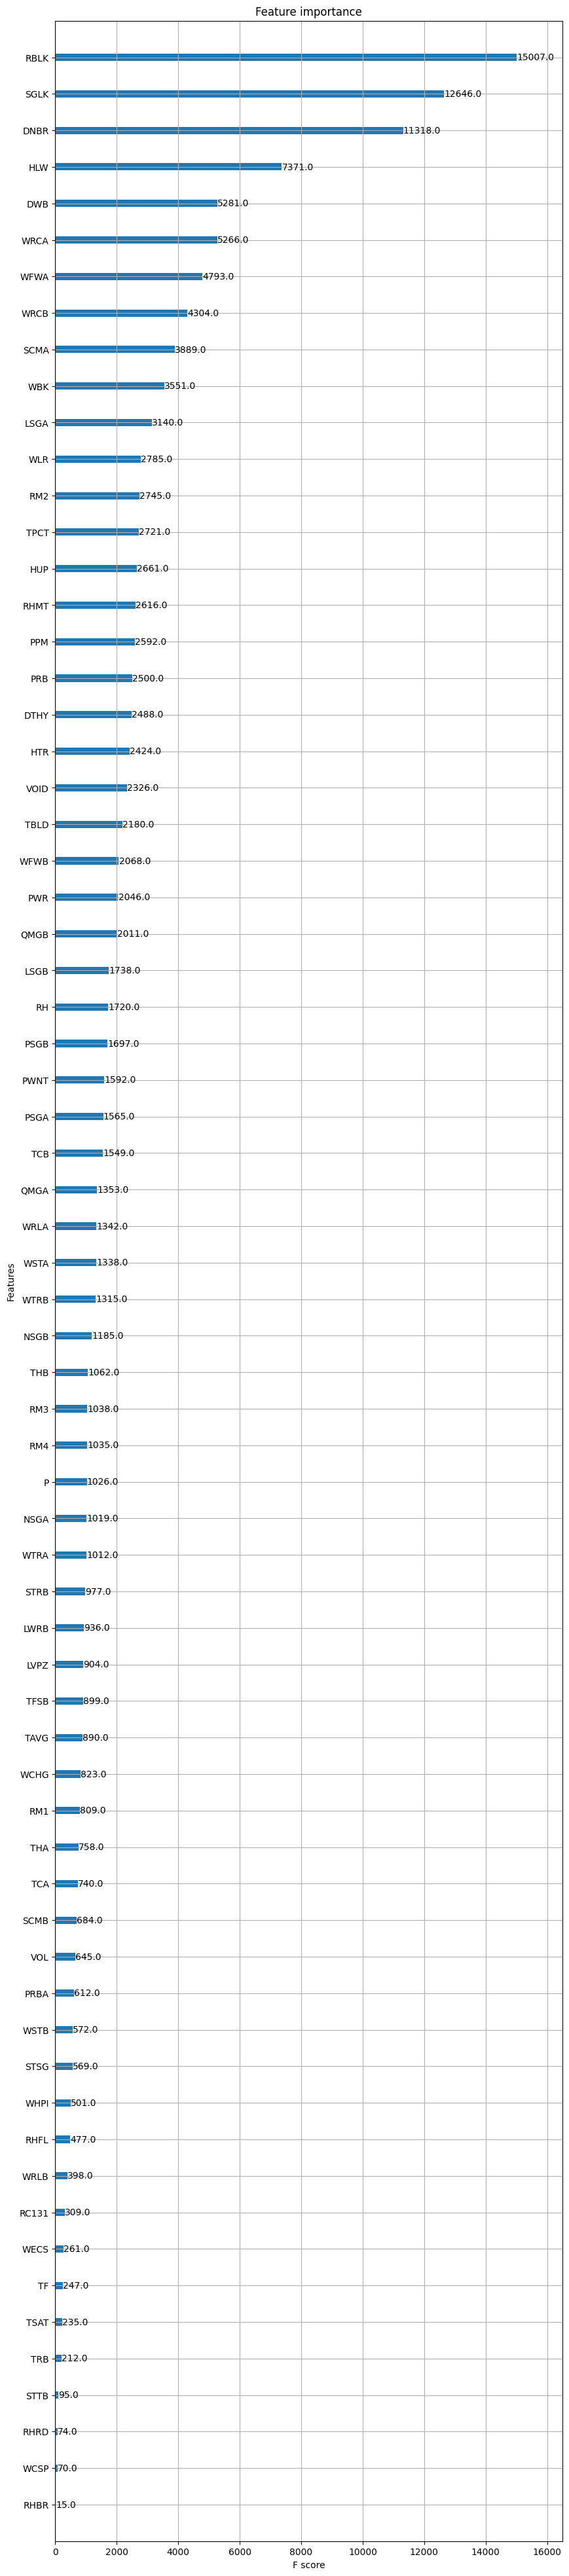

In [17]:
fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax, importance_type='weight')
plt.show()

In [18]:
from sklearn.inspection import permutation_importance
# Permutation Importance
result = permutation_importance(xgb_model, test, Y_test, n_repeats=10, random_state=1214)
# 중요도 출력
importance = result.importances_mean
stds = result.importances_std

Feature 0: 8.574668768843719e-05
Feature 1: 9.681077642242908e-05
Feature 2: 0.006461427820651155
Feature 3: 0.0025585705197355146
Feature 4: -8.298066550493921e-05
Feature 5: 0.0029845379359942025
Feature 6: 0.004555638536221052
Feature 7: 6.638453240395136e-05
Feature 8: 0.0
Feature 9: 2.212817746798379e-05
Feature 10: 0.0007136337233424773
Feature 11: -7.744862113794327e-05
Feature 12: 2.4894199651481765e-05
Feature 13: -2.4894199651481765e-05
Feature 14: 0.12179348878378
Feature 15: 0.0014908859569054077
Feature 16: 7.191657677094732e-05
Feature 17: -8.021464332144123e-05
Feature 18: 2.7660221834979737e-05
Feature 19: 5.5320443669959474e-05
Feature 20: -3.319226620197568e-05
Feature 21: 3.595828838547366e-05
Feature 22: 2.4894199651481765e-05
Feature 23: 0.0
Feature 24: 0.0004425635493596758
Feature 25: -1.659613310098784e-05
Feature 26: 0.0
Feature 27: 2.4894199651481765e-05
Feature 28: 0.0
Feature 29: 1.659613310098784e-05
Feature 30: -0.00012170497607391084
Feature 31: 0.0
Featu

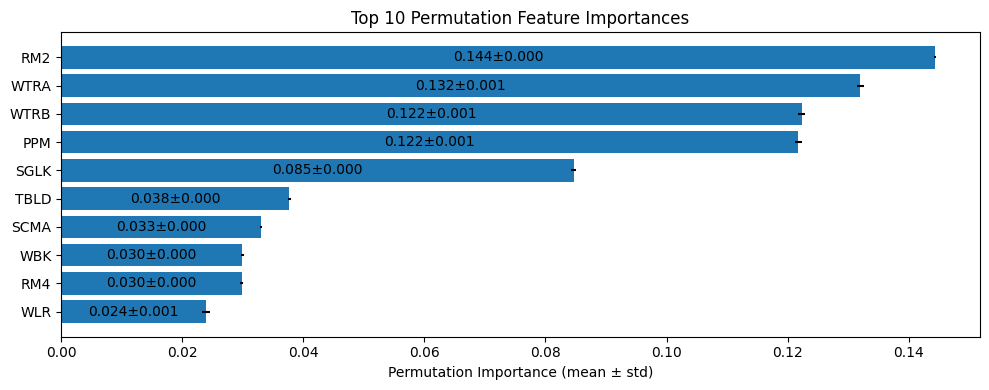

In [45]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = test.columns.tolist()
importance = result.importances_mean
stds        = result.importances_std
indices     = np.argsort(importance)[::-1]

# 2) 상위 10개만 선택
top_n = 10
top_indices = indices[:top_n]
top_features = [feature_names[i] for i in top_indices]
top_means    = importance[top_indices]
top_stds     = stds[top_indices]

# 3) 시각화
fig, ax = plt.subplots(figsize=(10, top_n * 0.4))

bars = ax.barh(
    y=np.arange(top_n),
    width=top_means,
    xerr=top_stds,
    align='center'
)

# 4) 막대 안에 수치 표시
for i, (mean, std) in enumerate(zip(top_means, top_stds)):
    ax.text(
        x=mean / 2,           # 막대 길이 절반 지점
        y=i,                  # 각 막대의 y 위치
        s=f"{mean:.3f}±{std:.3f}",
        va='center',          # 수직 중앙 정렬
        ha='center',          # 수평 중앙 정렬
        fontsize=10
    )

# 5) 축 레이블 / 타이틀
ax.set_yticks(np.arange(top_n))
ax.set_yticklabels(top_features)
ax.set_xlabel('Permutation Importance (mean ± std)')
ax.set_title('Top 10 Permutation Feature Importances')
ax.invert_yaxis()  # 가장 중요한 피처가 위로

plt.tight_layout()
plt.show()

### ### XGBoost 모델 분석(shap)

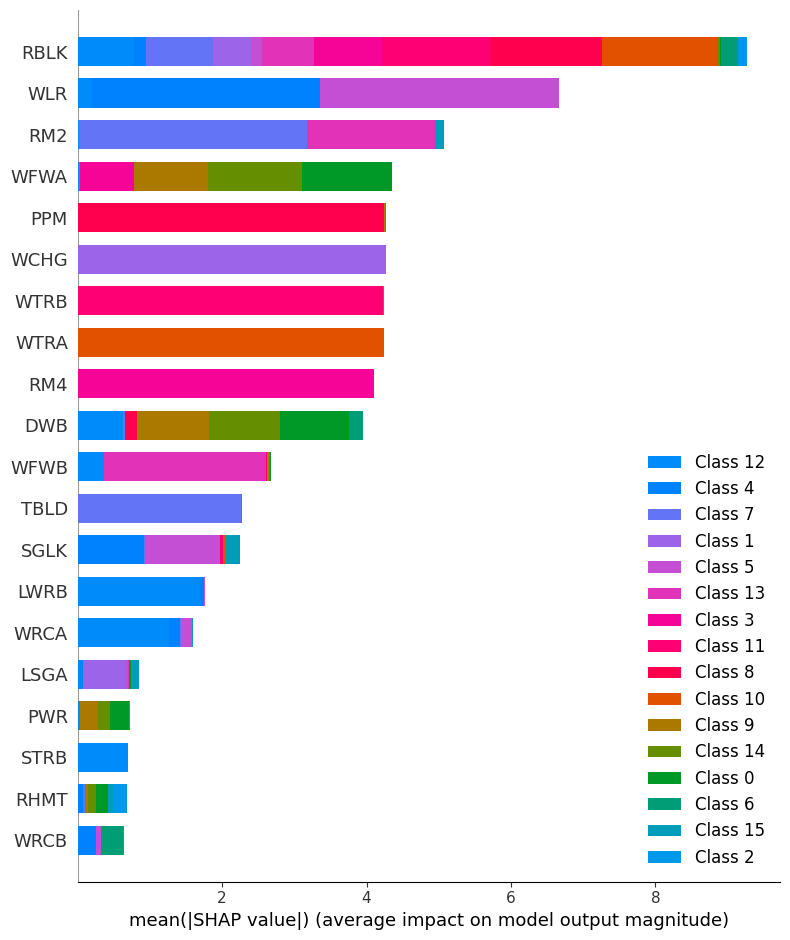

In [19]:
# Tree Shap
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values1 = explainer.shap_values(test.values, check_additivity=False)
shap.summary_plot(shap_values1, test)

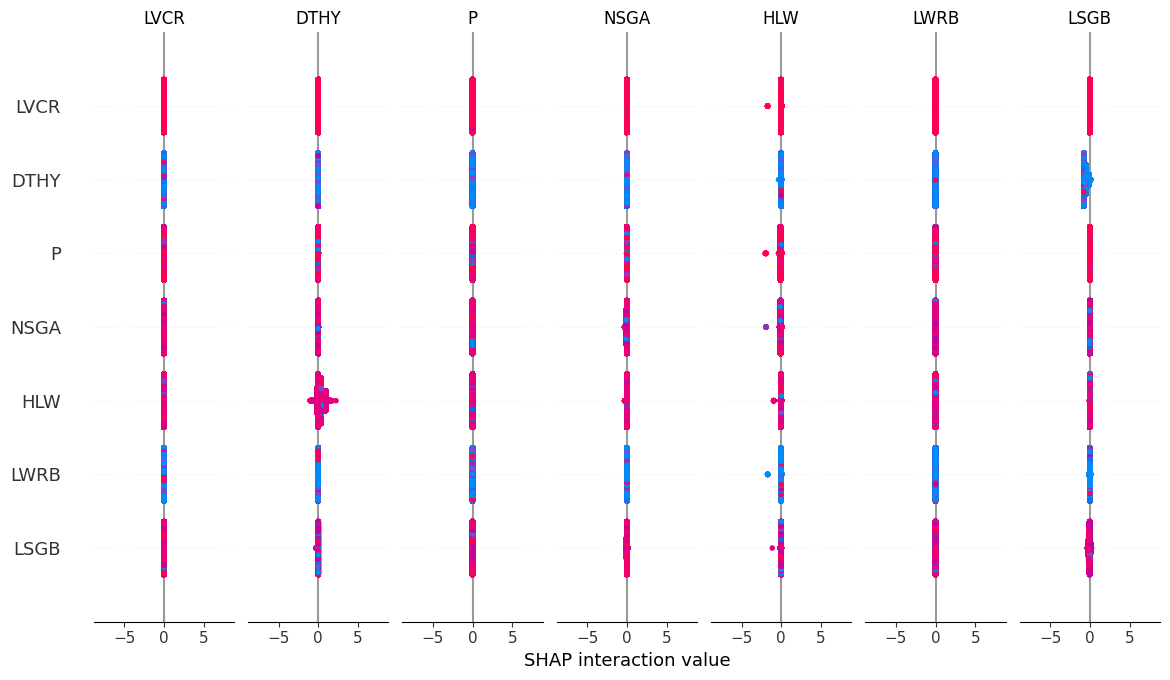

In [20]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values2 = explainer(test.values, check_additivity=False)
shap.summary_plot(shap_values2, test)

Class 0 beeswarm plot:


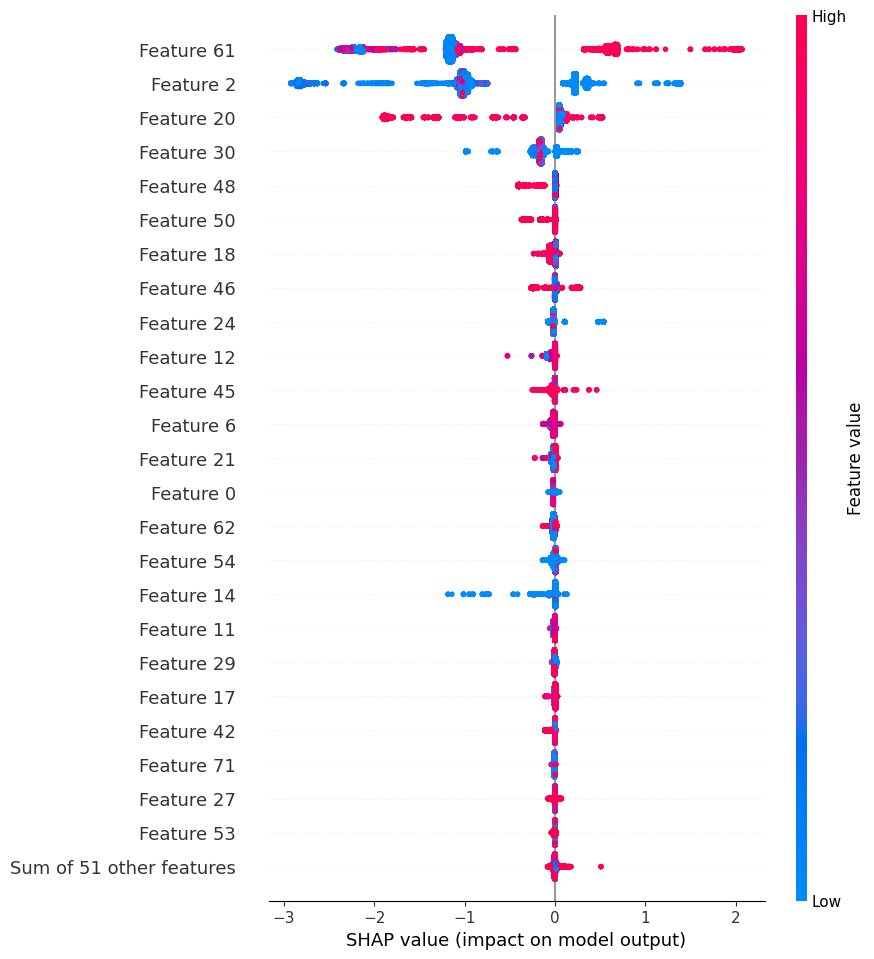

Class 1 beeswarm plot:


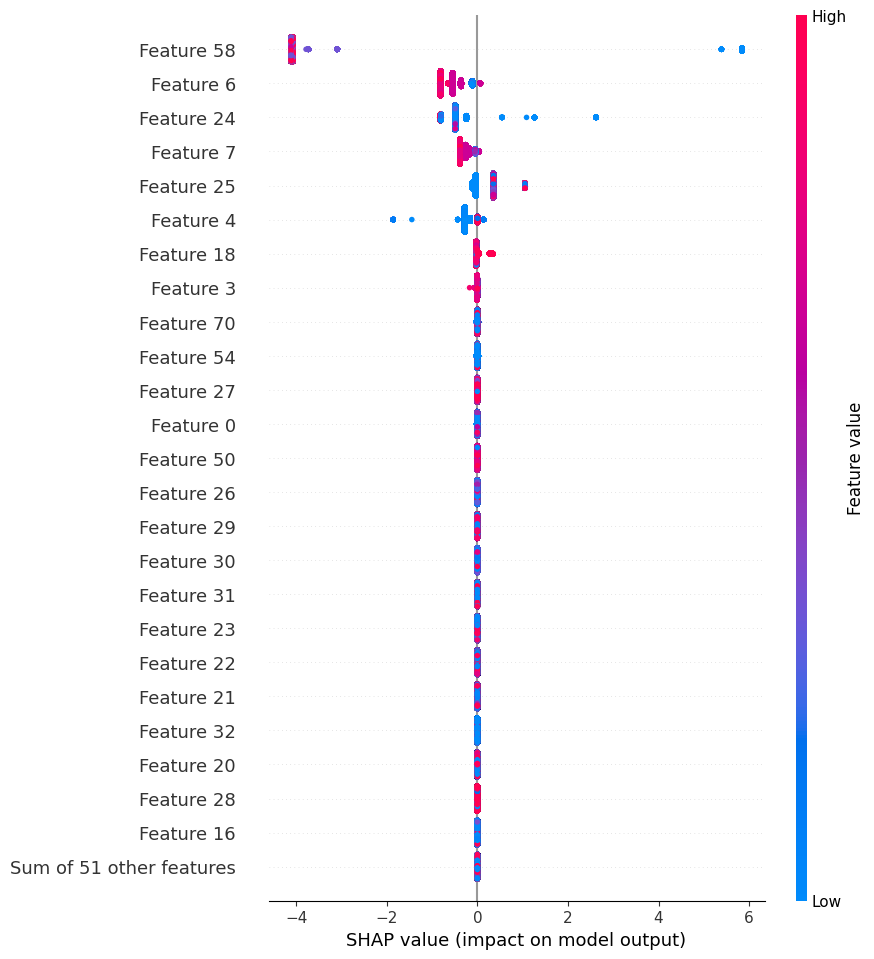

Class 2 beeswarm plot:


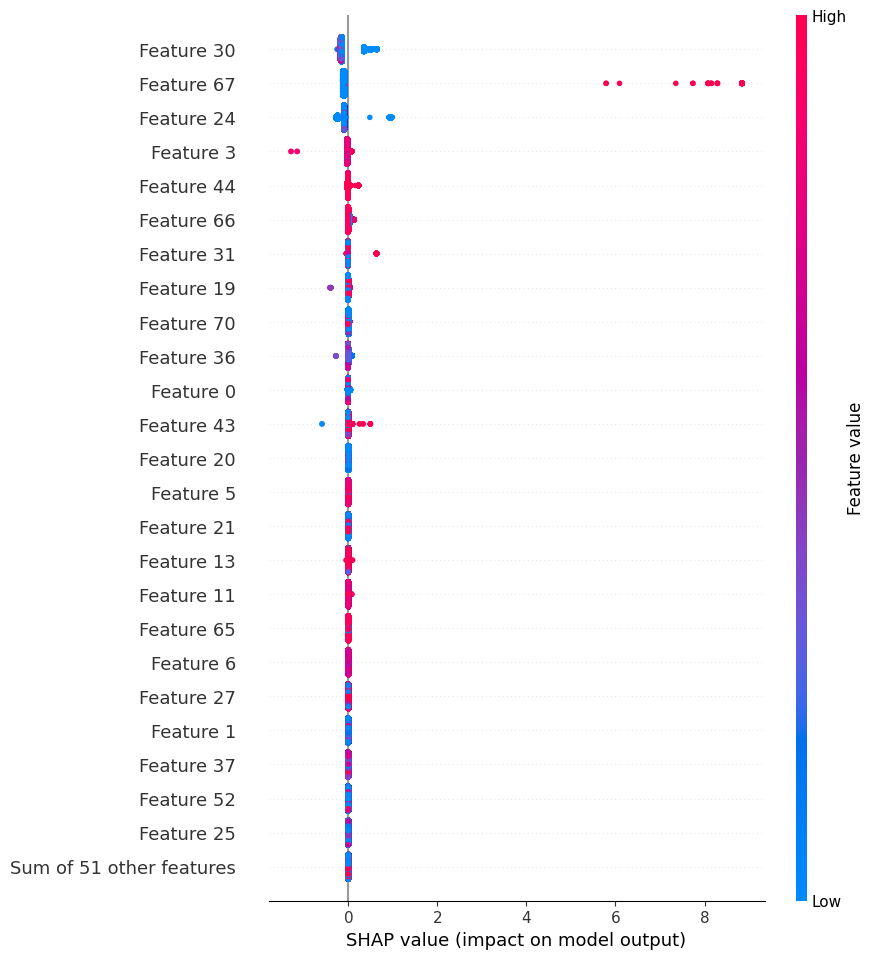

Class 3 beeswarm plot:


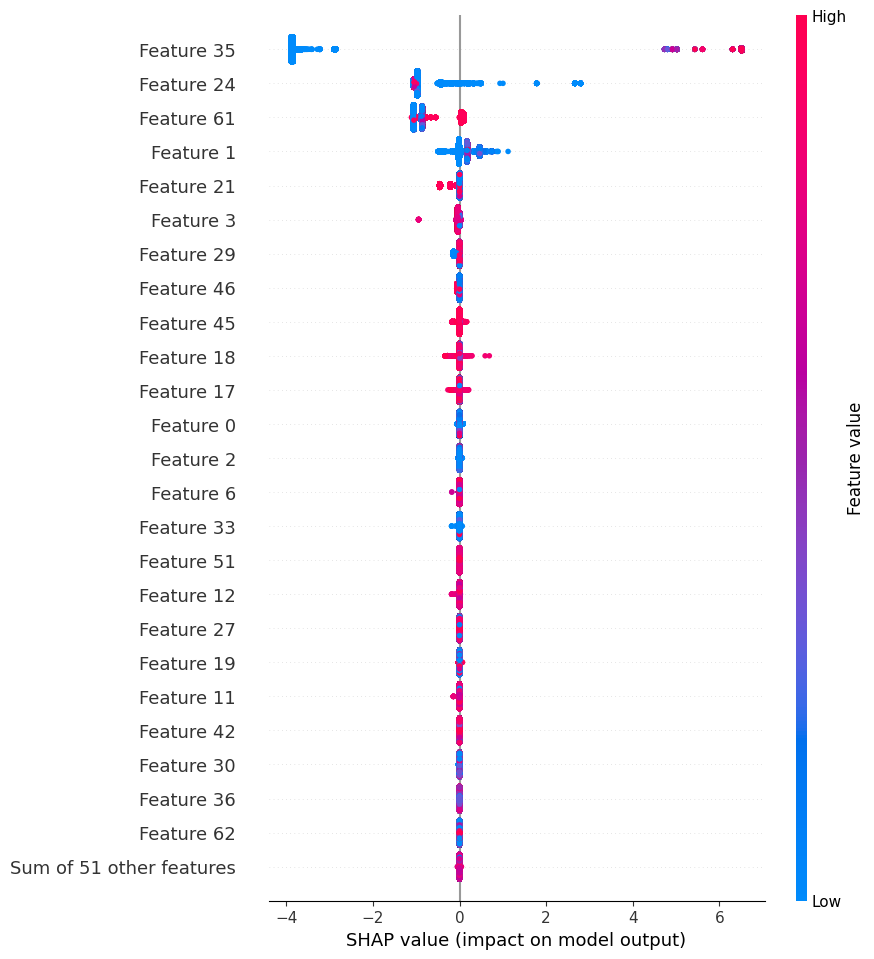

Class 4 beeswarm plot:


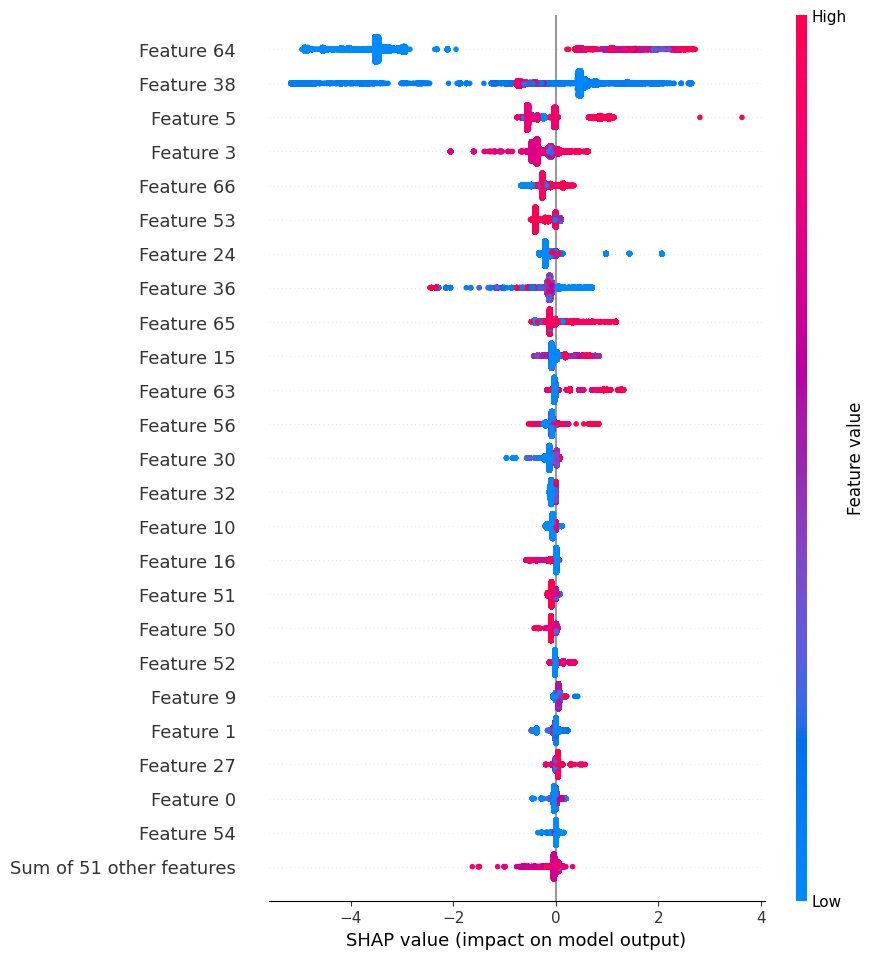

Class 5 beeswarm plot:


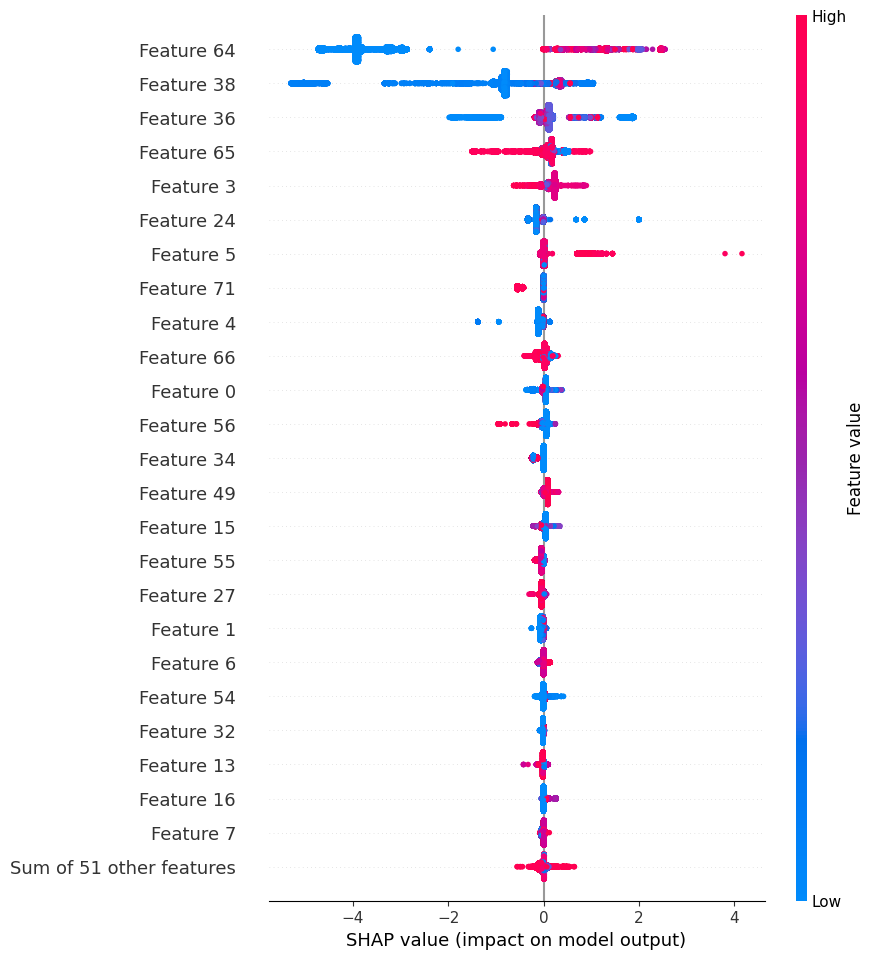

Class 6 beeswarm plot:


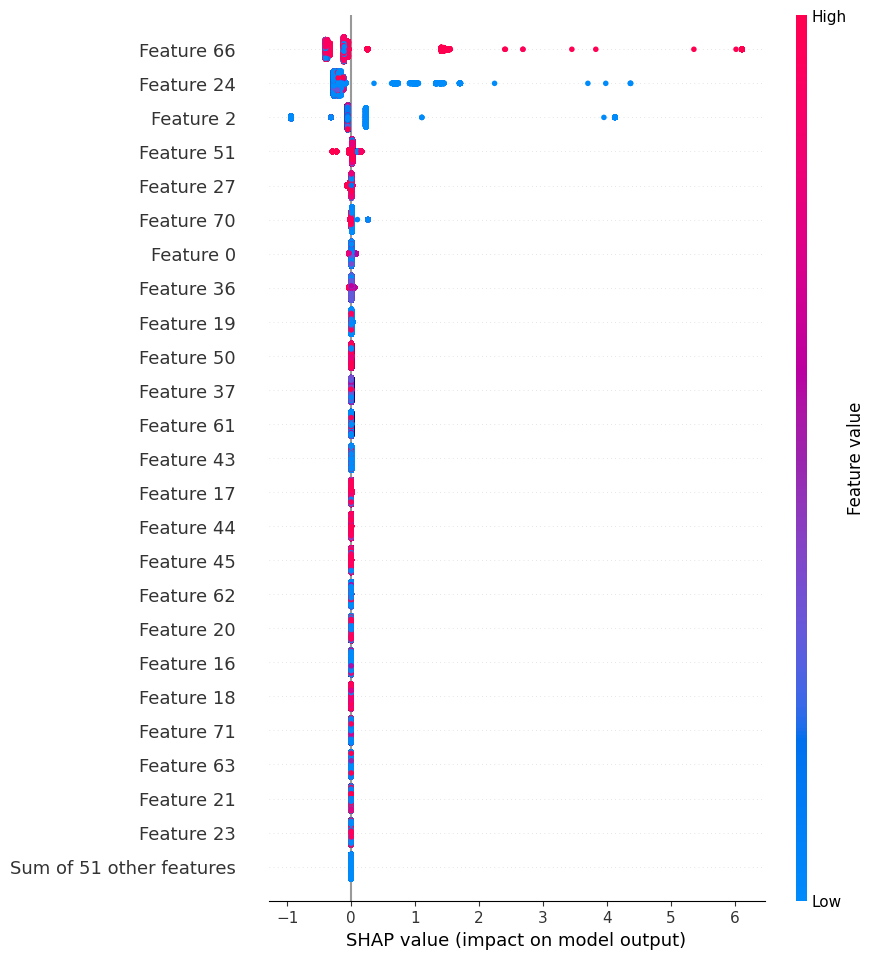

Class 7 beeswarm plot:


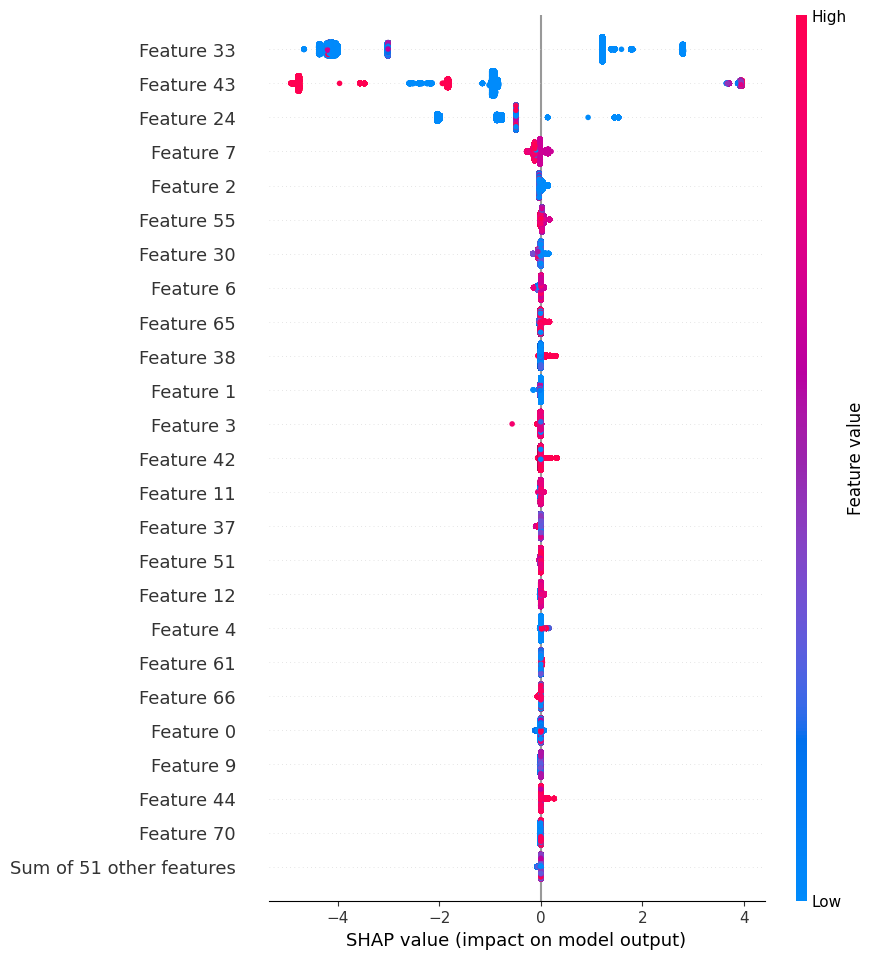

Class 8 beeswarm plot:


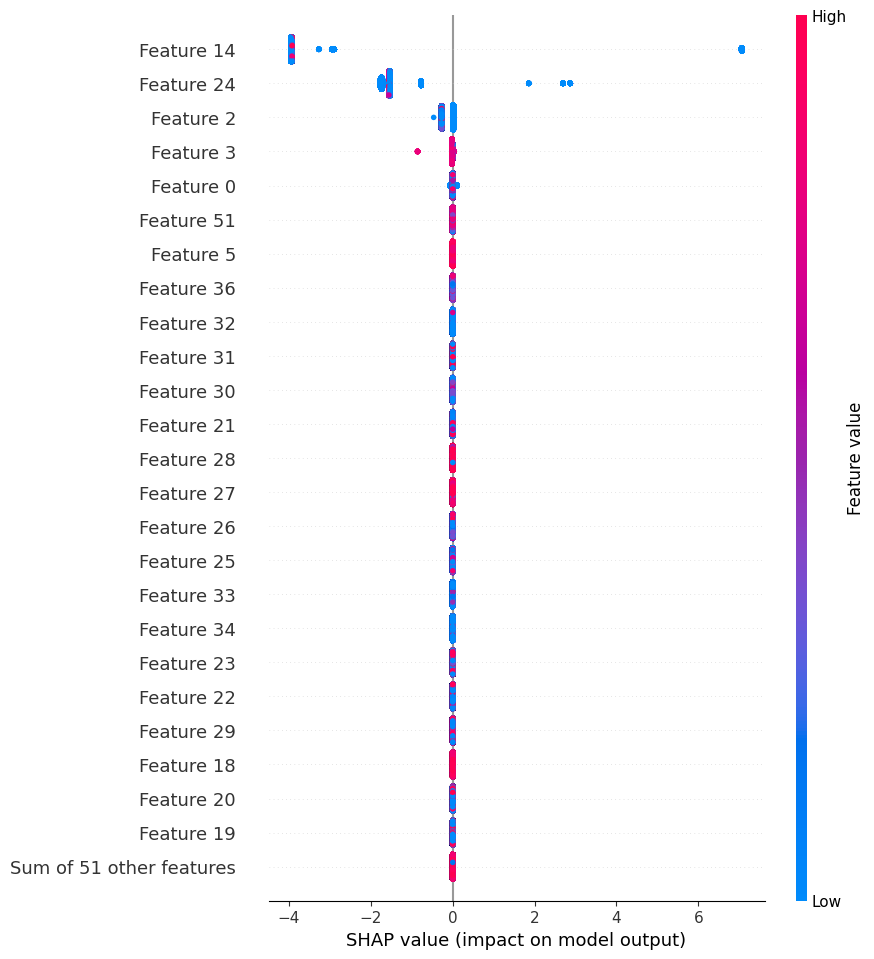

Class 9 beeswarm plot:


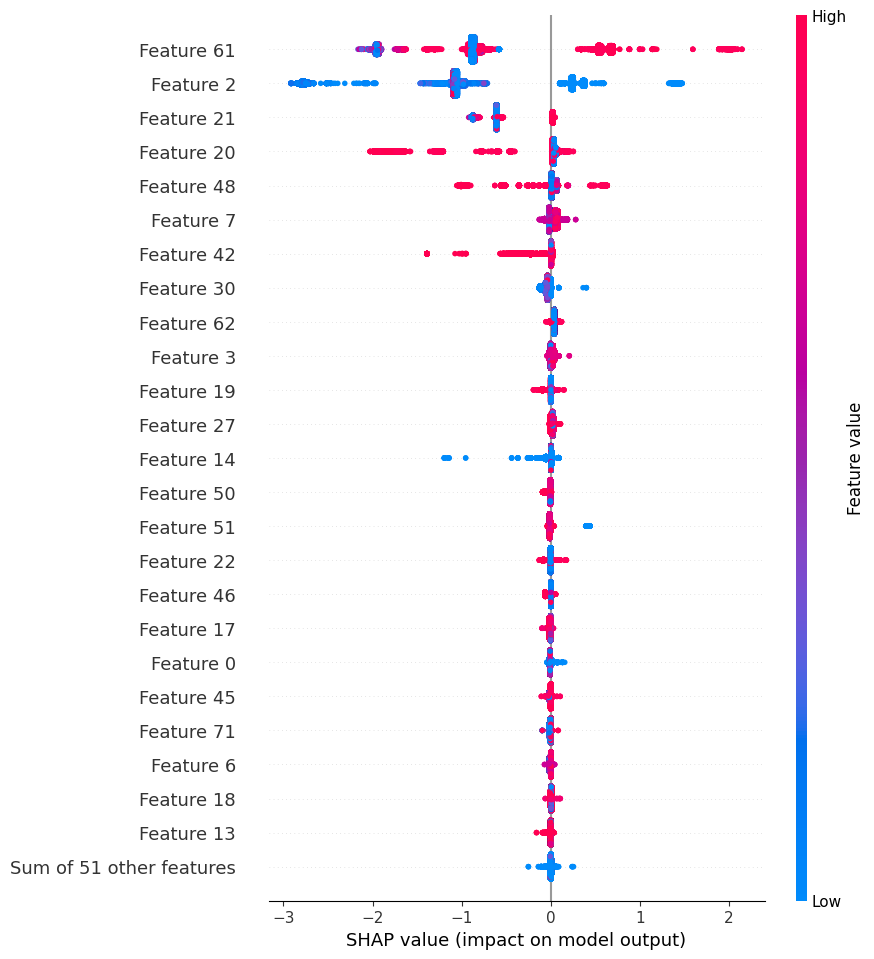

Class 10 beeswarm plot:


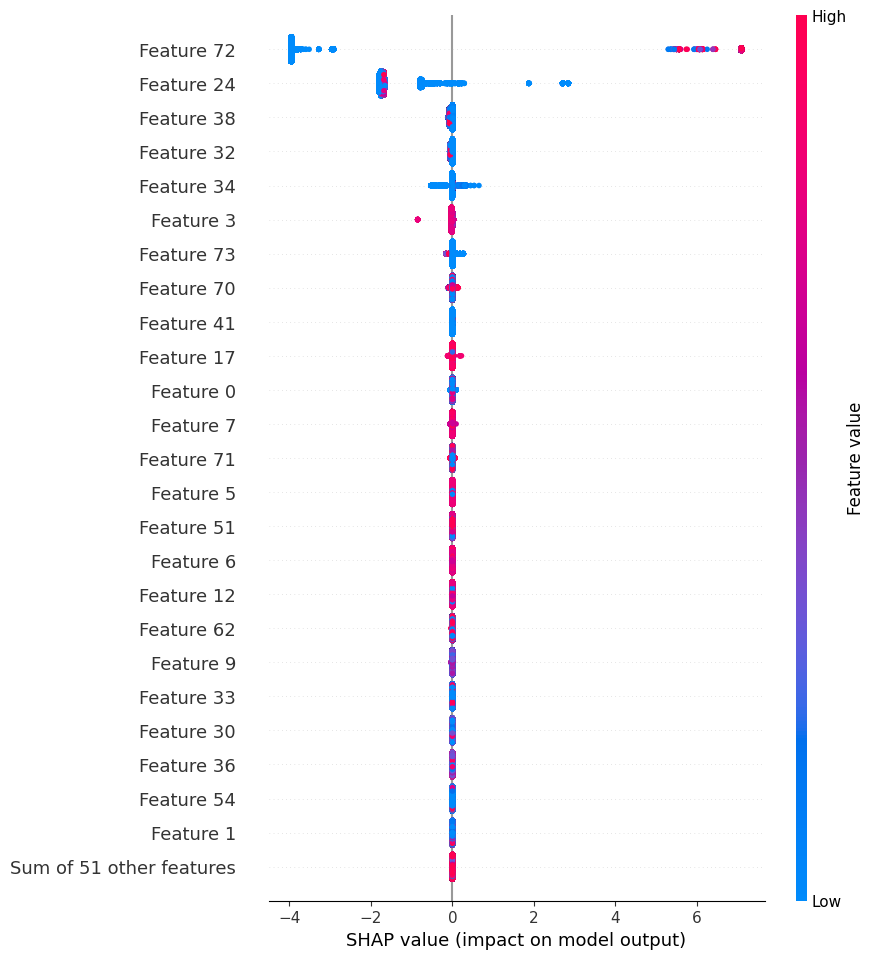

Class 11 beeswarm plot:


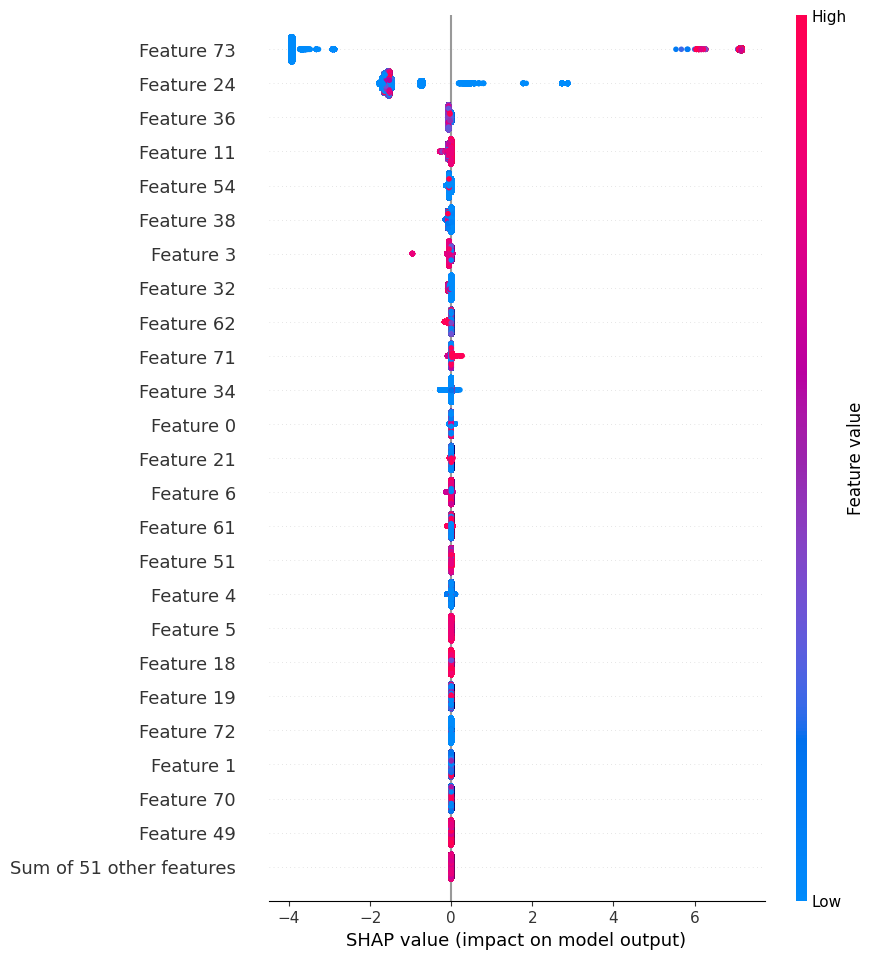

Class 12 beeswarm plot:


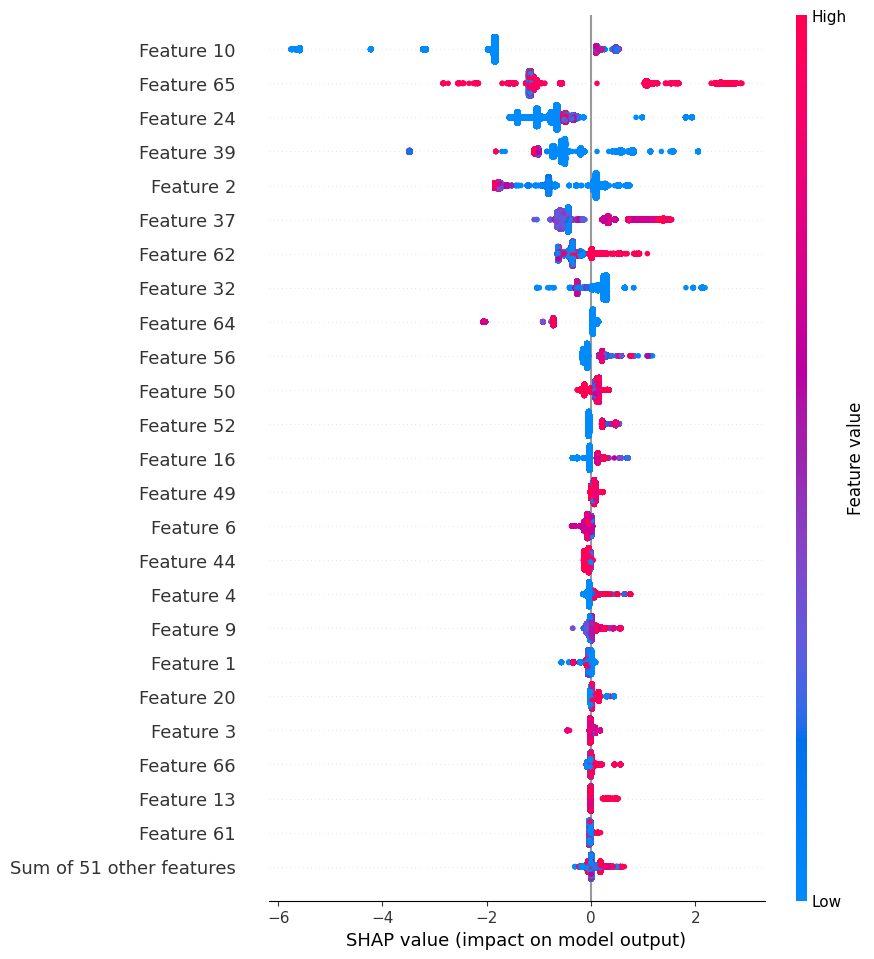

Class 13 beeswarm plot:


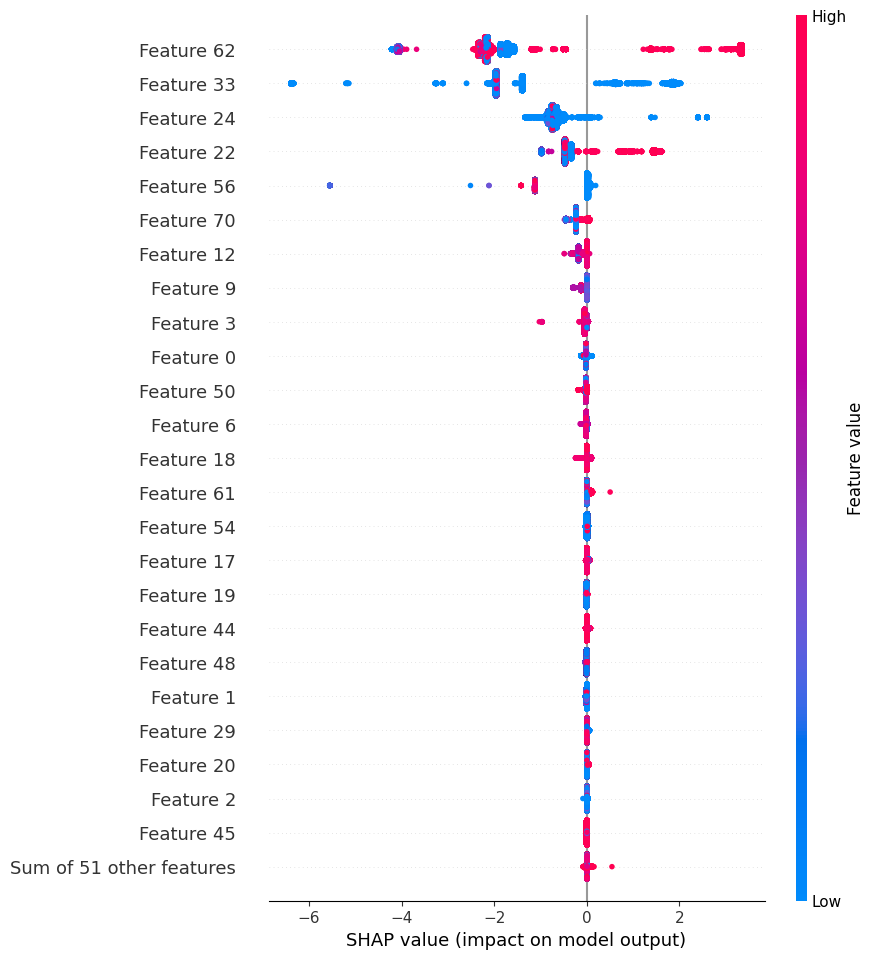

Class 14 beeswarm plot:


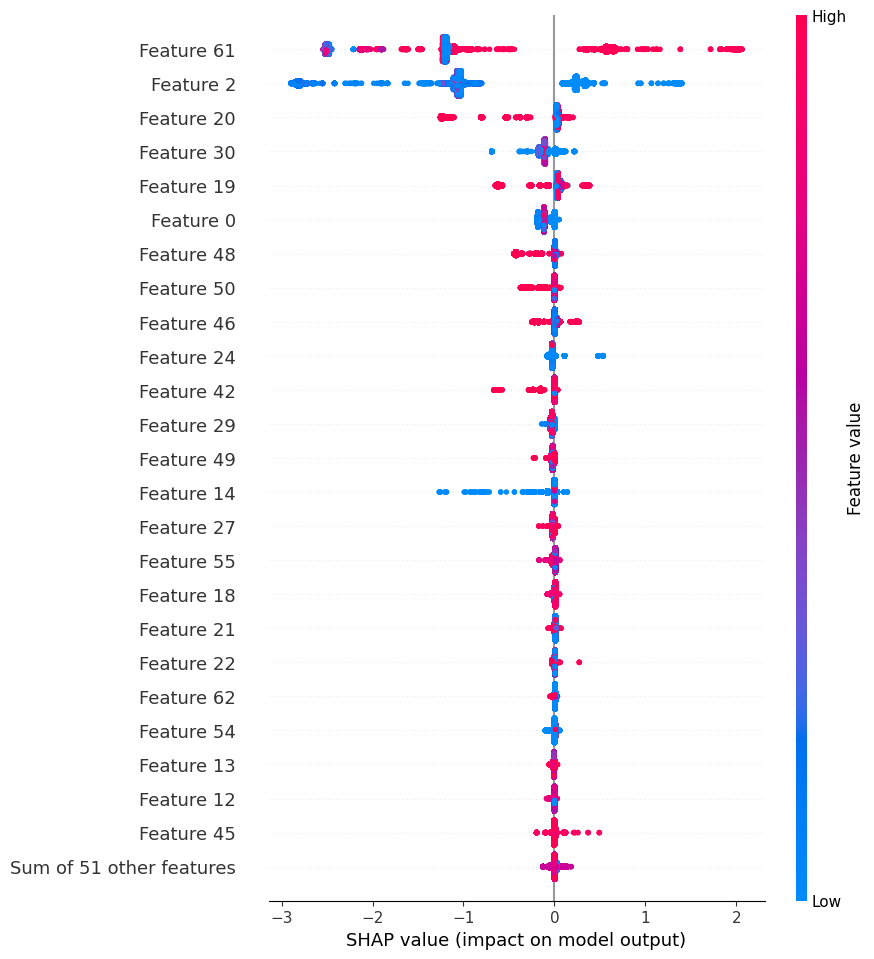

Class 15 beeswarm plot:


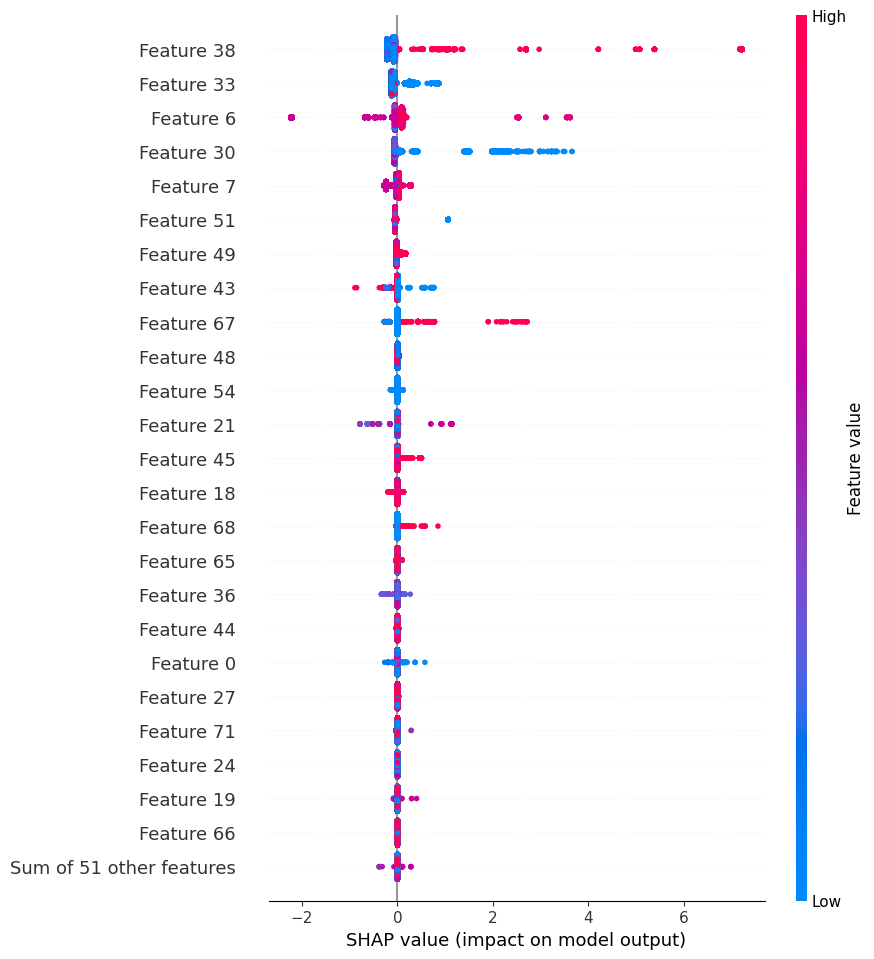

In [21]:
# shap
for class_idx in range(16):
    print(f"Class {class_idx} beeswarm plot:")
    shap.plots.beeswarm(shap_values2[:, :, class_idx], max_display=25)

Class 0 bar plot:


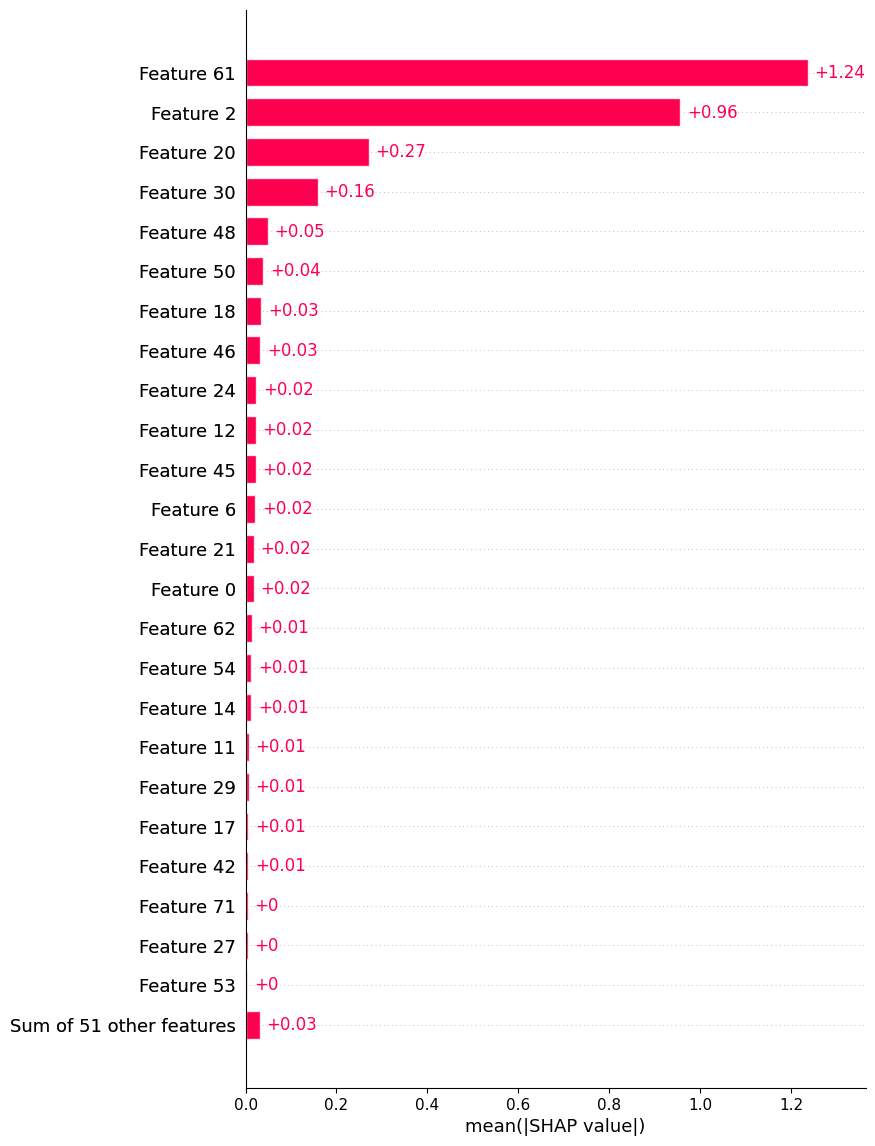

Class 1 bar plot:


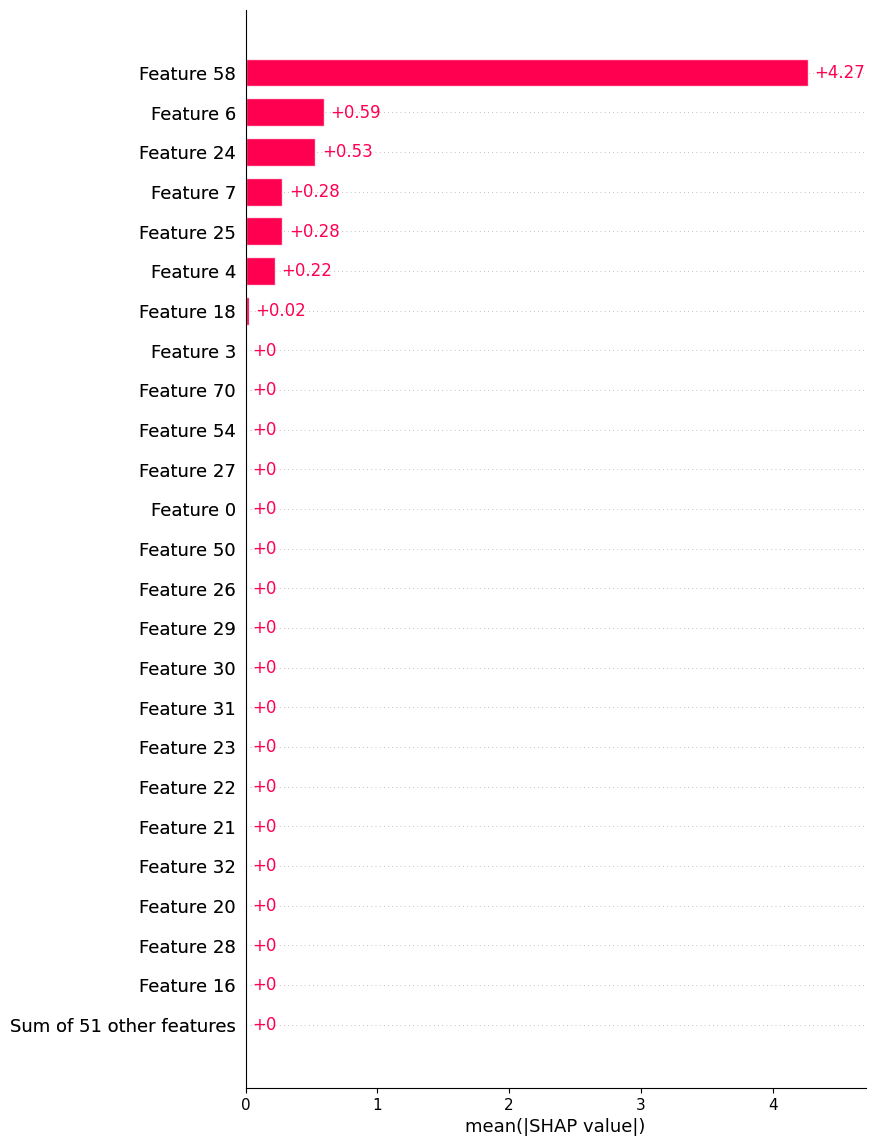

Class 2 bar plot:


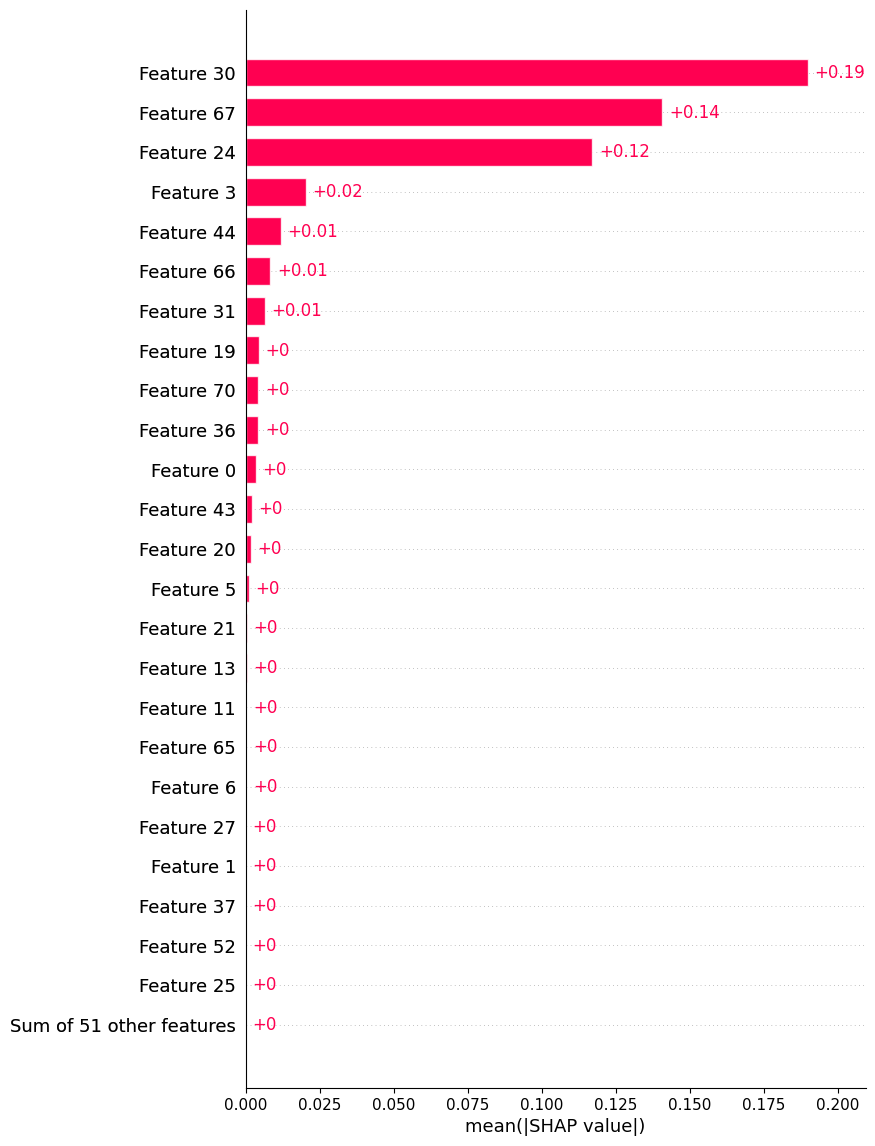

Class 3 bar plot:


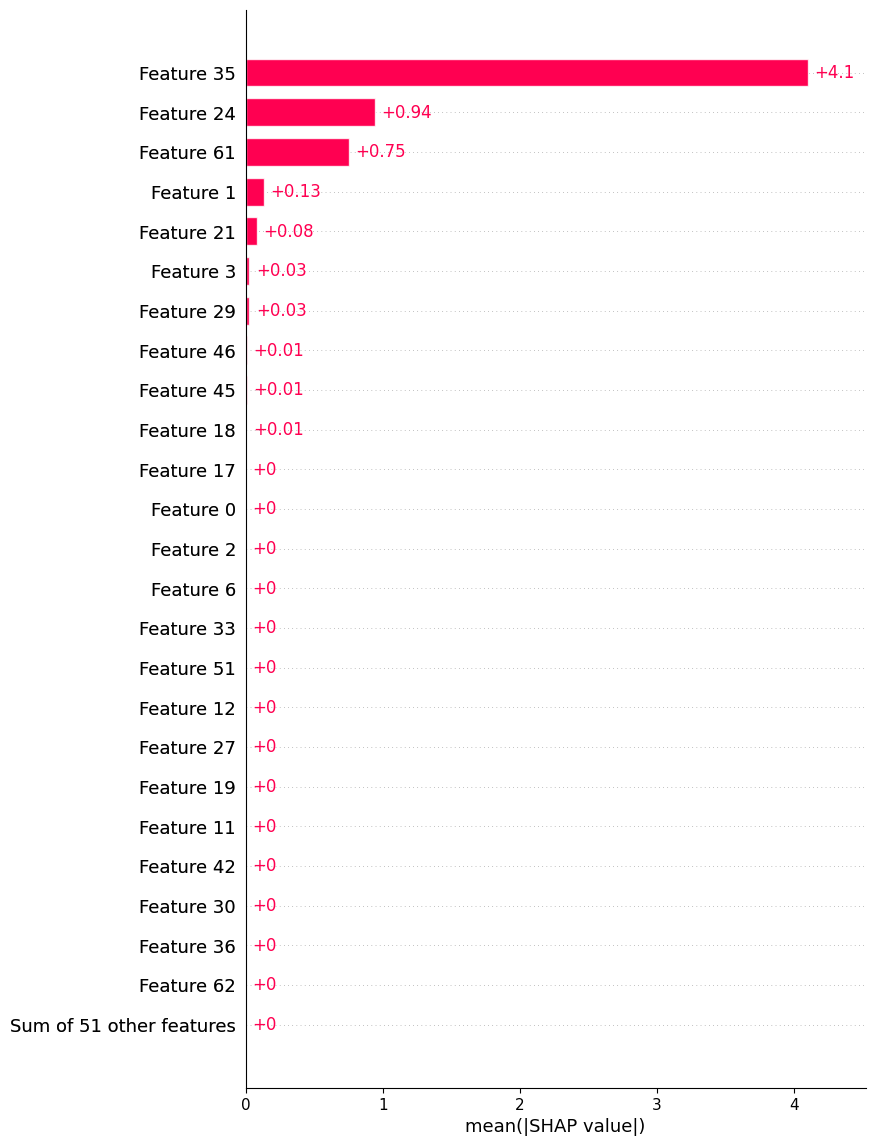

Class 4 bar plot:


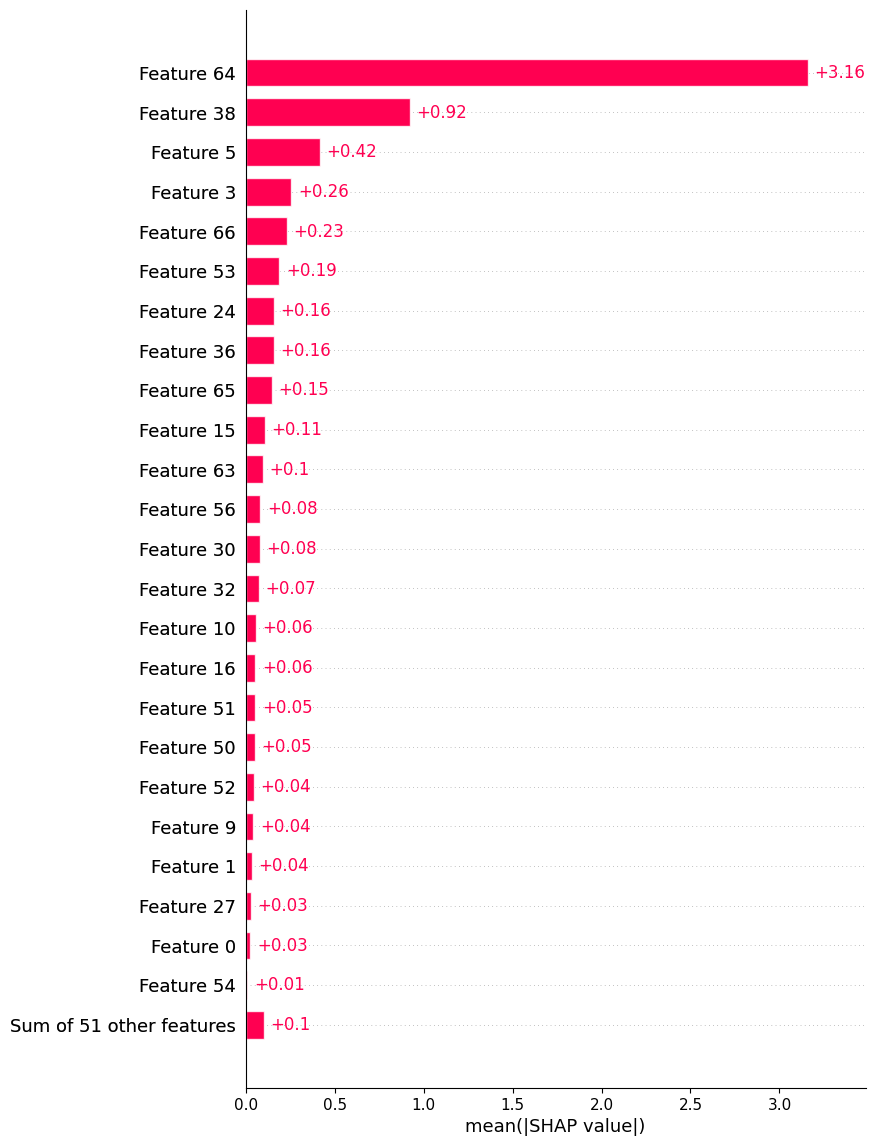

Class 5 bar plot:


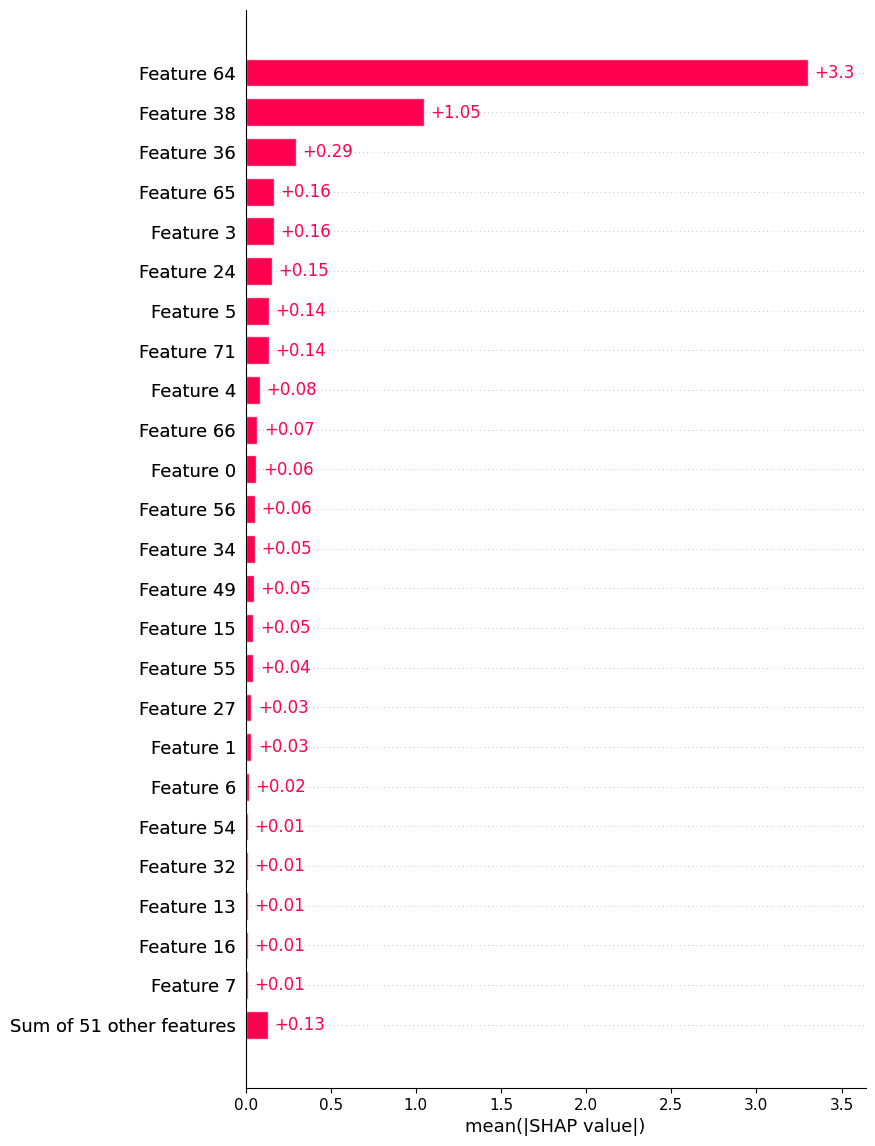

Class 6 bar plot:


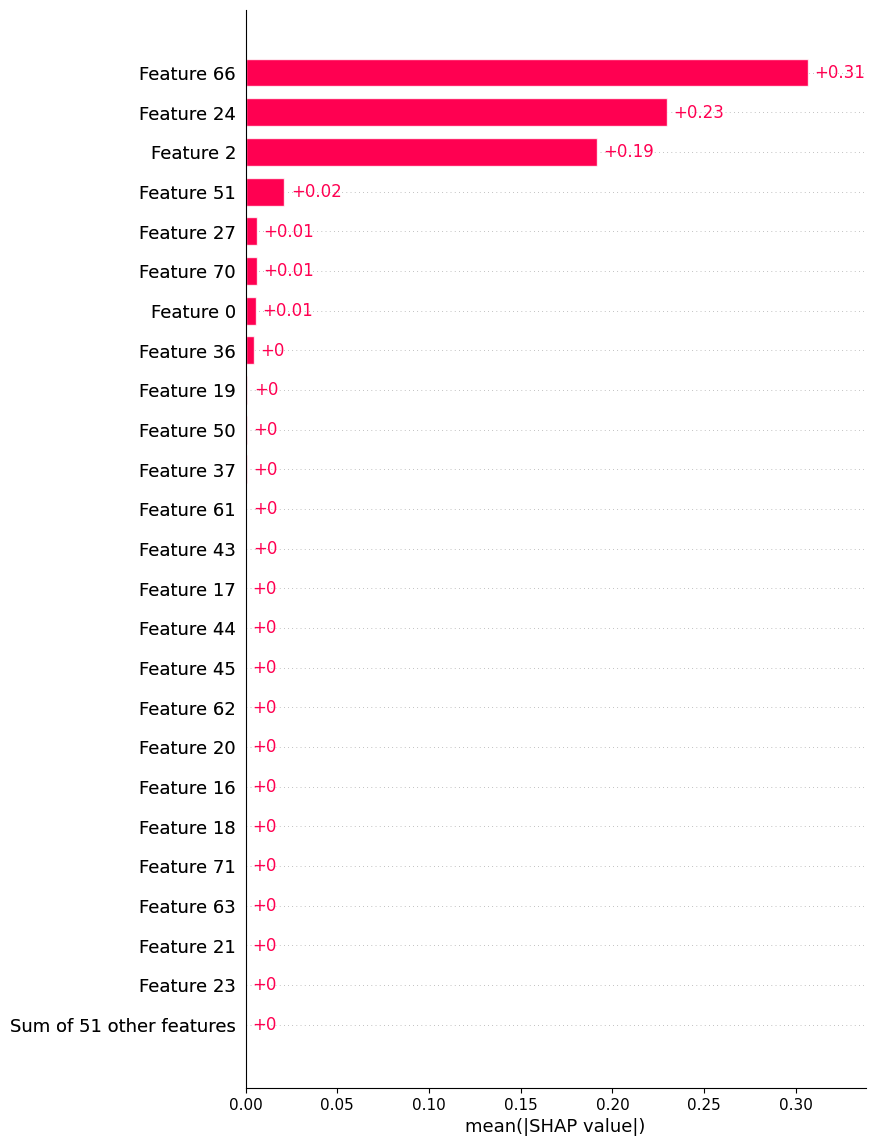

Class 7 bar plot:


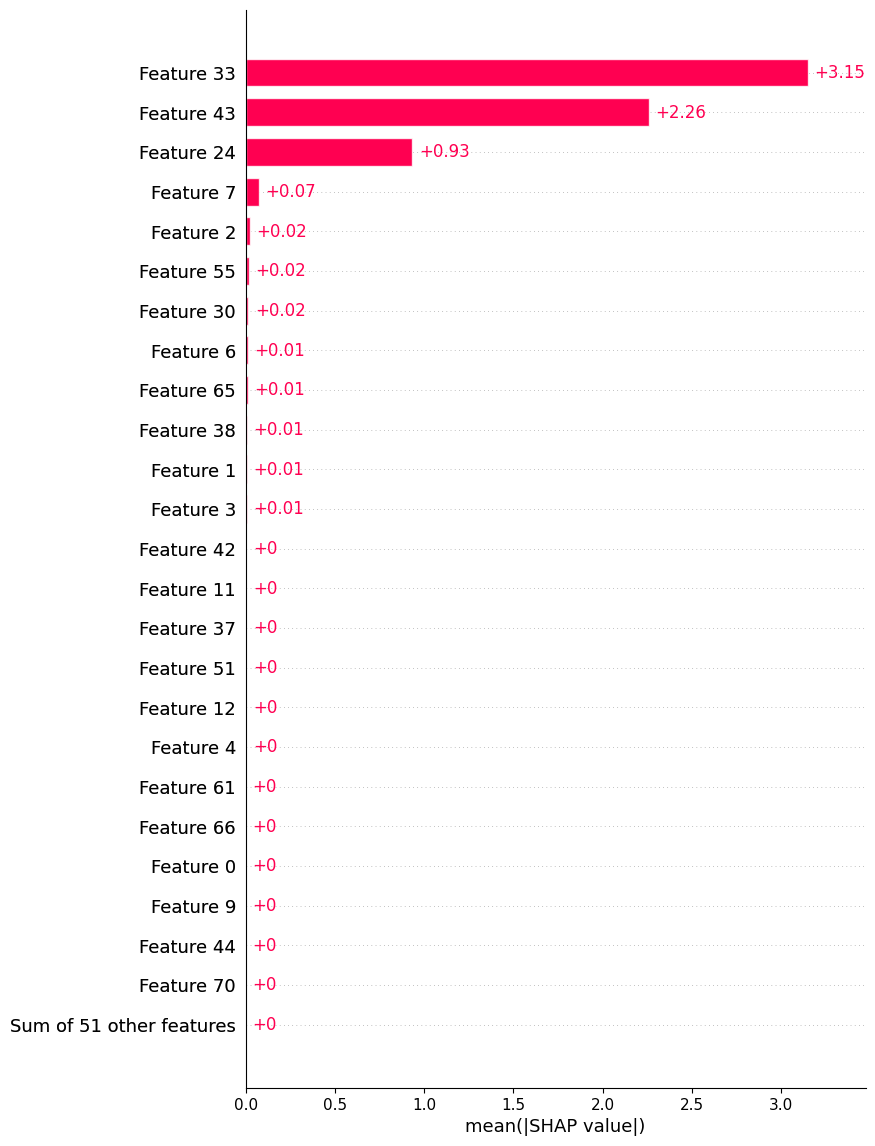

Class 8 bar plot:


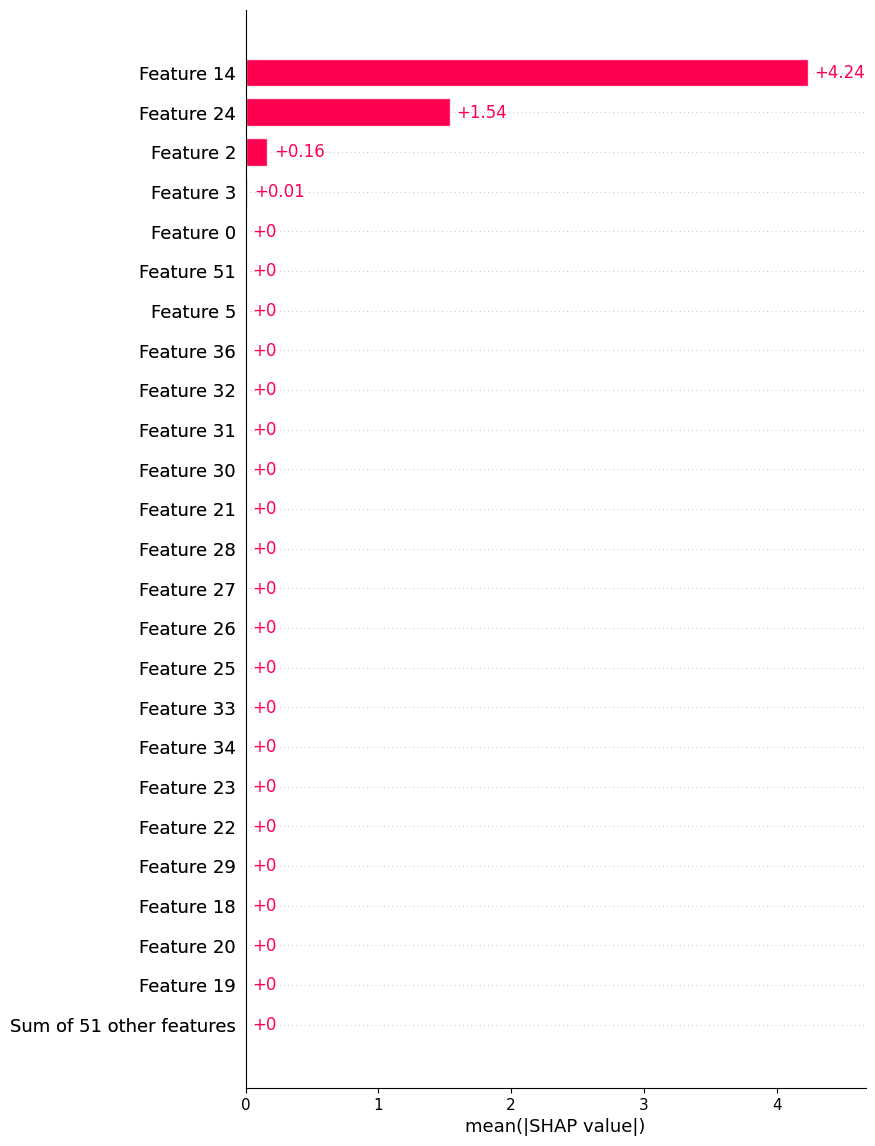

Class 9 bar plot:


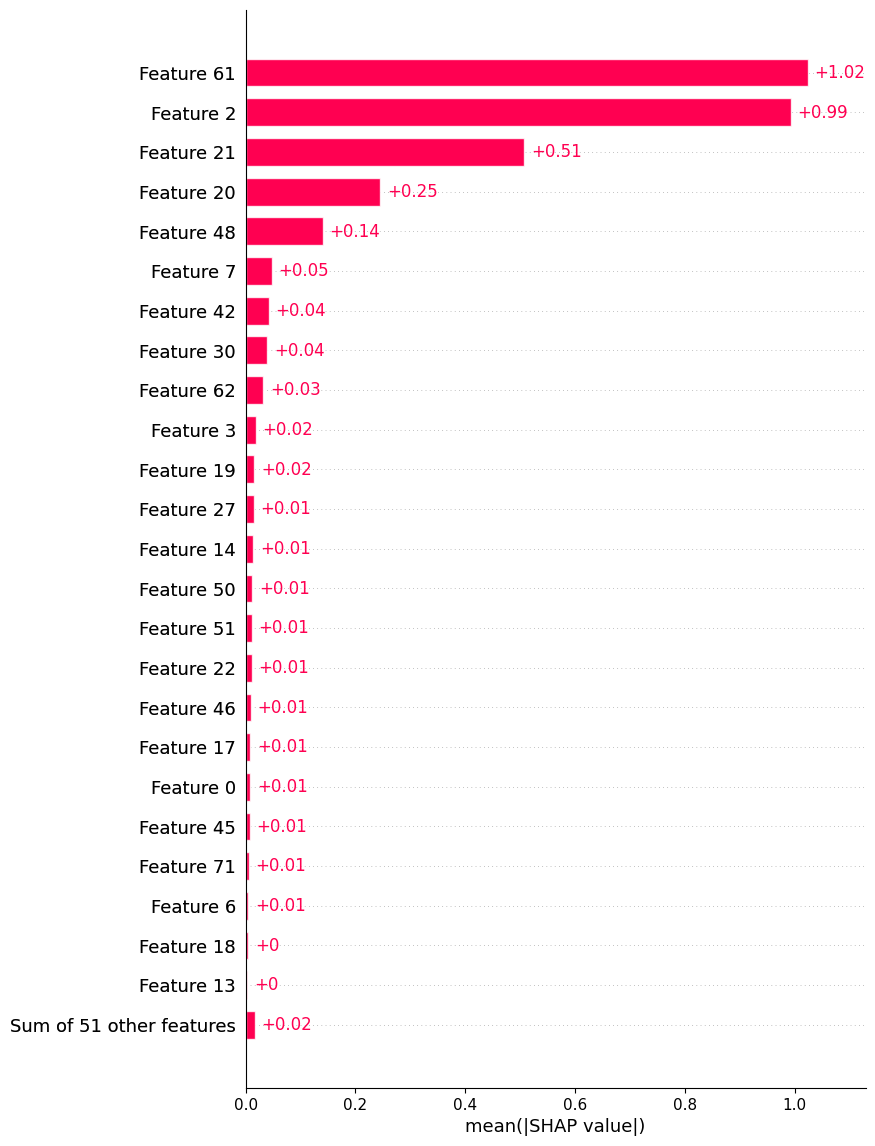

Class 10 bar plot:


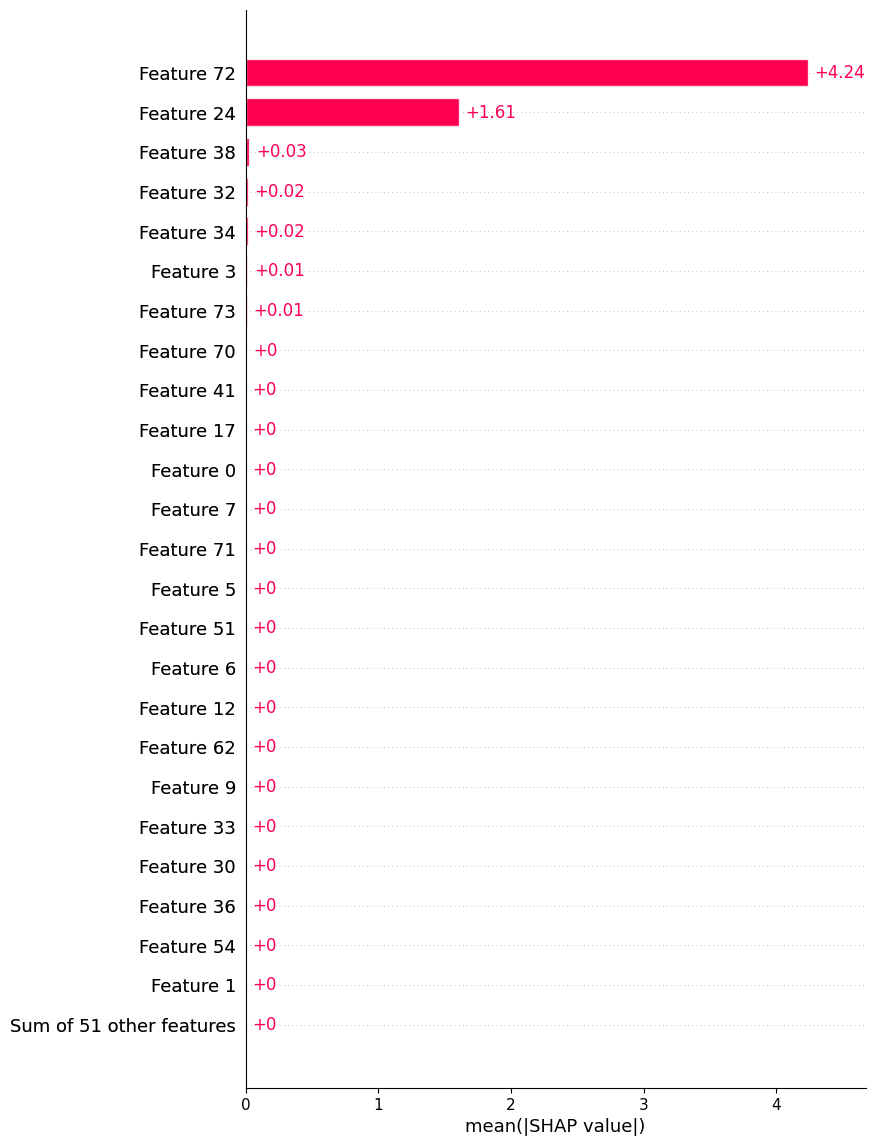

Class 11 bar plot:


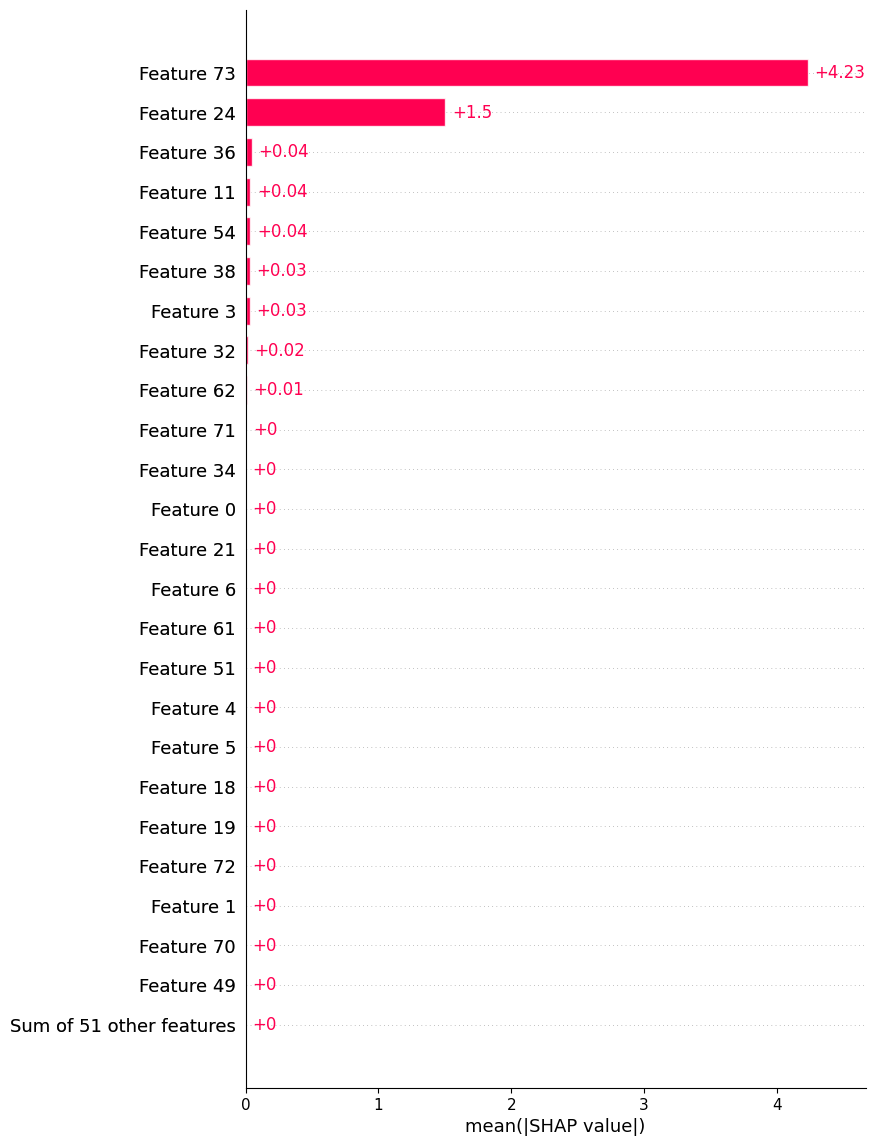

Class 12 bar plot:


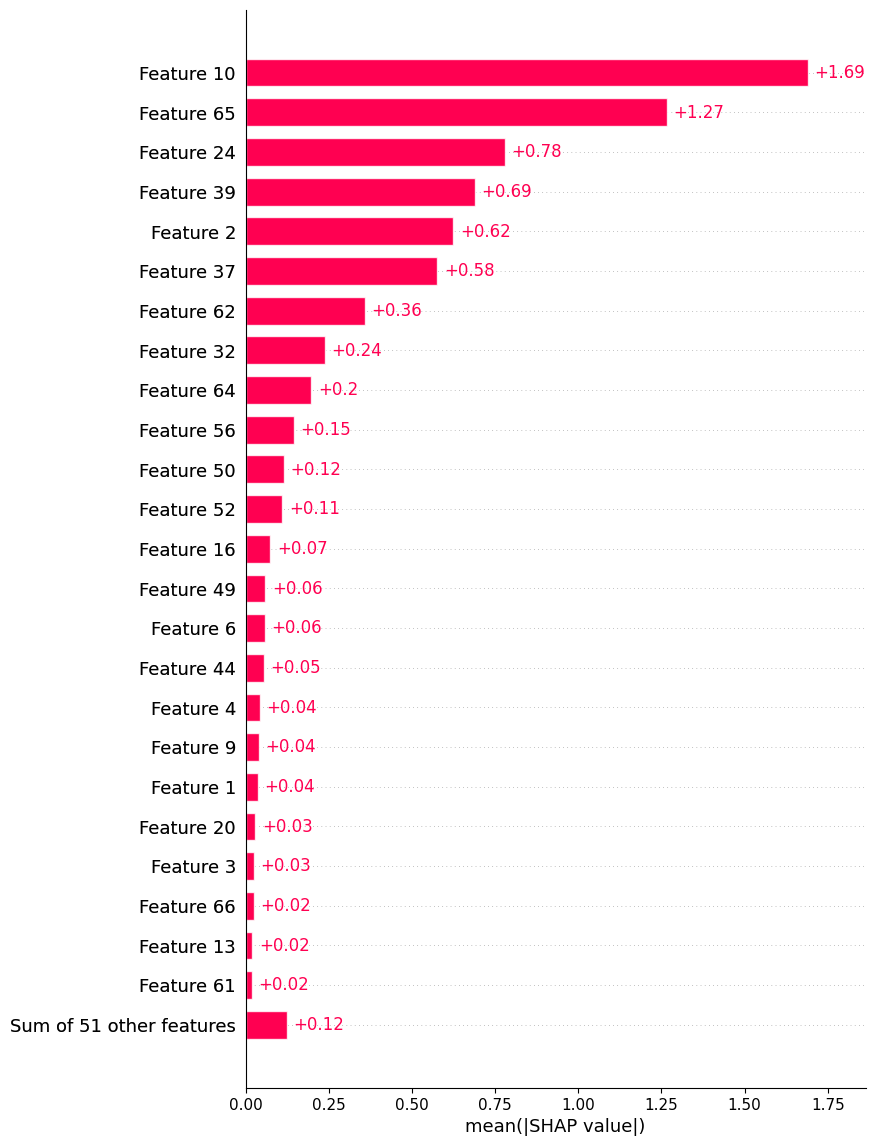

Class 13 bar plot:


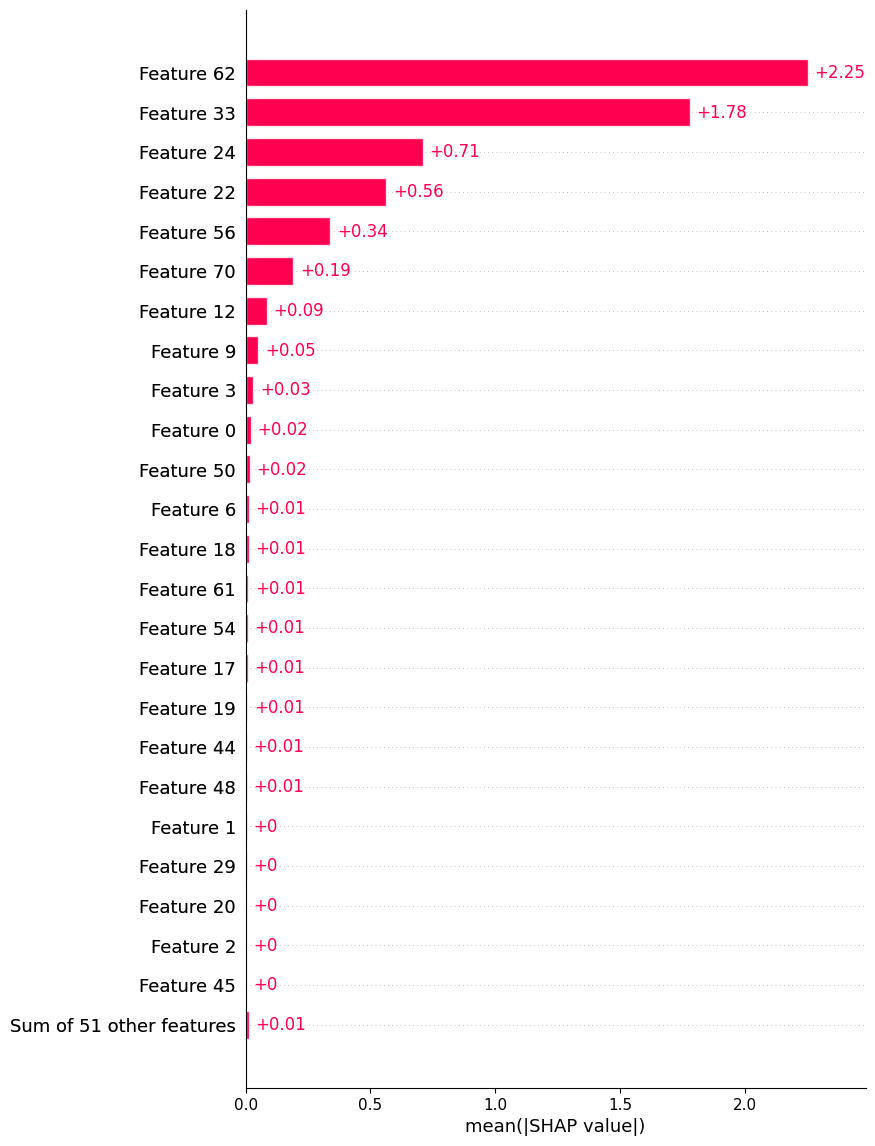

Class 14 bar plot:


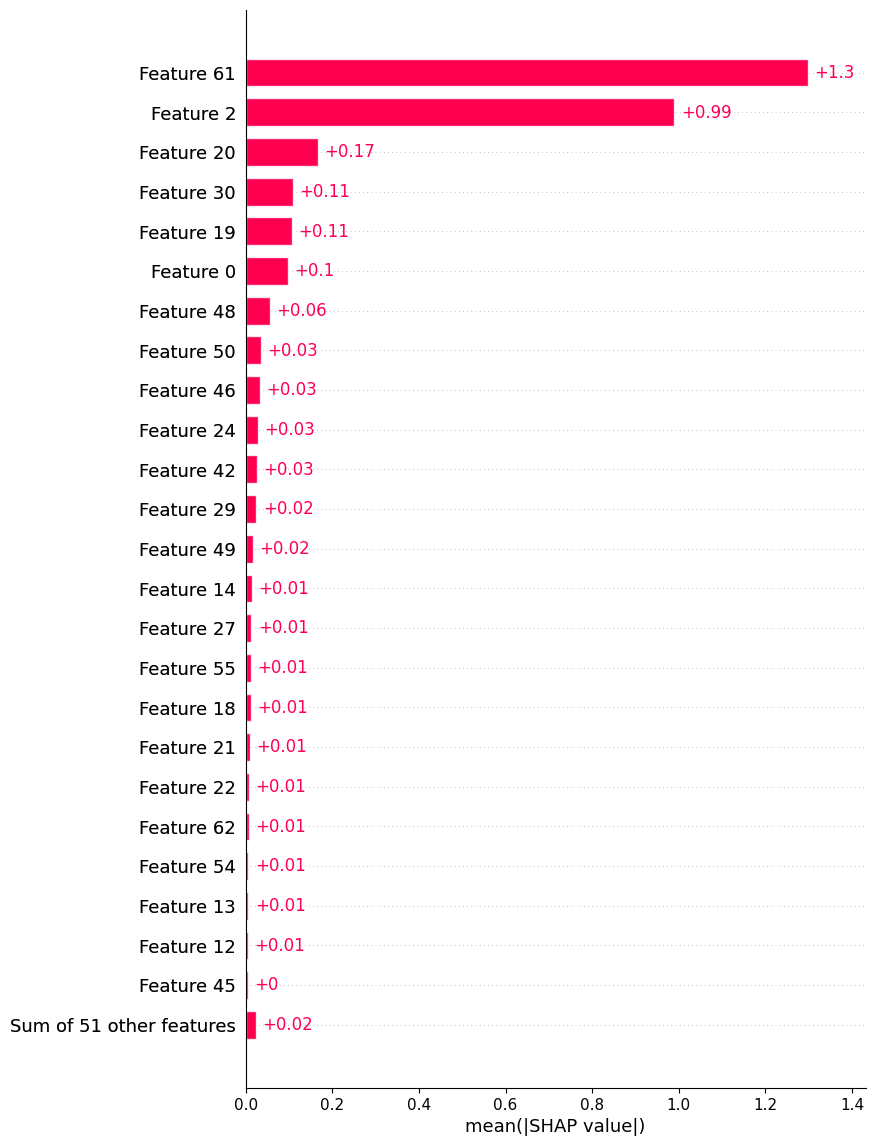

Class 15 bar plot:


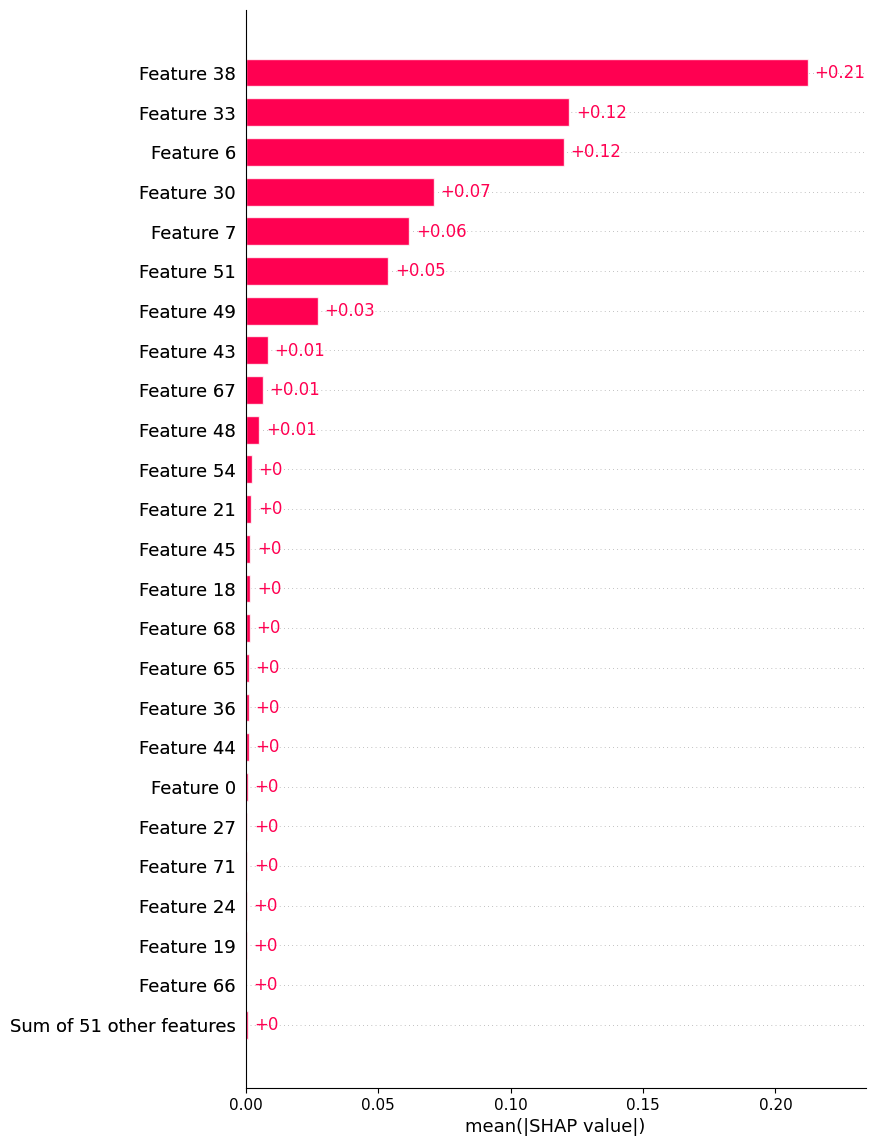

In [22]:
#shap
for class_idx in range(16):
    print(f"Class {class_idx} bar plot:")
    shap.plots.bar(shap_values2[:, :, class_idx],max_display=25)

---

In [23]:
feature_names = train.columns.tolist()
feature_names

['DNBR',
 'DTHY',
 'DWB',
 'HLW',
 'HTR',
 'HUP',
 'LSGA',
 'LSGB',
 'LVCR',
 'LVPZ',
 'LWRB',
 'NSGA',
 'NSGB',
 'P',
 'PPM',
 'PRB',
 'PRBA',
 'PSGA',
 'PSGB',
 'PWNT',
 'PWR',
 'QMGA',
 'QMGB',
 'QMWT',
 'RBLK',
 'RC131',
 'RC87',
 'RH',
 'RHBR',
 'RHFL',
 'RHMT',
 'RHRD',
 'RM1',
 'RM2',
 'RM3',
 'RM4',
 'SCMA',
 'SCMB',
 'SGLK',
 'STRB',
 'STSG',
 'STTB',
 'TAVG',
 'TBLD',
 'TCA',
 'TCB',
 'TF',
 'TFPK',
 'TFSB',
 'THA',
 'THB',
 'TPCT',
 'TRB',
 'TSAT',
 'VOID',
 'VOL',
 'WBK',
 'WCFT',
 'WCHG',
 'WCSP',
 'WECS',
 'WFWA',
 'WFWB',
 'WHPI',
 'WLR',
 'WRCA',
 'WRCB',
 'WRLA',
 'WRLB',
 'WSPY',
 'WSTA',
 'WSTB',
 'WTRA',
 'WTRB',
 'WUP']

import pandas as pd
import numpy as np
path = "Operation_OPR1000/"

test1 = pd.read_csv(path + "LOCA/LOCA_OPR1000_250_1.csv")
test1 = test1[common_columns2]
test2 = pd.read_csv(path + "LOCAC/LOCAC_OPR1000_250_1.csv")
test2 = test2[common_columns2]

test1 = test1[test1['TIME'] <= 4000]
test2 = test2[test2['TIME'] <= 4000]

test1 = test1[test1['TIME'] % 60 == 0]
test2 = test2[test2['TIME'] % 60 == 0]

test1 = test1.drop('TIME', axis = 1)
test2 = test2.drop('TIME', axis = 1)

X1 = create_features_from_df(test1, window_size)
X2 = create_features_from_df(test2, window_size)

pred1 = xgb_model.predict(X1)
pred2 = xgb_model.predict(X2)

pred1 = pred1.tolist()
print(pred1)

pred2 = pred2.tolist()
print(pred2)